## **BUSINESS UNDERSTANDING**

Dengan meningkatnya jumlah pengguna, perusahaan e-commerce dihadapkan pada tantangan untuk memastikan penjualan dianggap stabil dalam beberapa bulan mendatang.
Hal ini penting agar tim pemasaran dan bisnis dapat mengambil keputusan strategis yang tepat untuk mengoptimalkan penjualan dalam bisnis dan mengatasi kemungkinan penurunan penjualan di kemudian hari.
Untuk mengatasi masalah ini, kita perlu mengembangkan model prediktif untuk pendapatan penjualan di masa depan


**Objective business :**

* Mendapatkan insight bisnis tentang produk terlaris di setiap segmen.
* Mendapatkan insight tentang pendapatan setiap tahun dan bulan.
* Mendapatkan insight tentang keuntungan setiap tahun dan bulan.
* mendapatkan insight tenatng pendapatan berdasarkan payment method

<br>**Business Understanding :**

* Berapa pendapatan setiap bulan?
* Berapa pendapatan setiap tahun?
* Platform apa yang sering digunakan pelanggan untuk membeli barang?
* Item apa yang paling sering dibeli oleh pelanggan?


<br>**Data Understanding :** <br>
Data E-Commerce dengan beberapa 4 entias :<br>
**Click Stream** : entitas yang memberikan informasi seputar perilaku customer.<br>
**Customer** : entitas yang memberikan informasi seputar data customer.<br>
**Product** : entitas yang memberikan informasi seputar data produk.<br>
**Transaction** : entitas yang memberikan informasi seputar data transaksi.

<br>**Data preparation :**

Code Used :
Python Version: 3.7.6 / Google Colaboration <br>
Packages: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and Feature Engine


## **Read Dataset**

In [ ]:
from google.colab import drive
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MAINPATH = '/content/drive/MyDrive/Dataset/'
os.listdir(MAINPATH)

['transactions.csv',
 'product.csv',
 'customer.csv',
 'click_stream.csv',
 'product_1_percent_sample.csv',
 'customer_1_percent_sample.csv',
 'transaction_1_percent_sample.csv',
 'click_stream_1_percent_sample.csv',
 'final.csv']

In [ ]:
df_stream = pd.read_csv(MAINPATH + 'click_stream.csv')
df_customer = pd.read_csv(MAINPATH + 'customer.csv' )
df_product = pd.read_csv(MAINPATH + 'product.csv', delimiter=',', encoding='utf-8', error_bad_lines=False)
df_transaction = pd.read_csv(MAINPATH + 'transactions.csv')

Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020: expected 10 fields, saw 11
Skipping line 35748: expected 10 fields, saw 11
Skipping line 35962: expected 10 fields, saw 11
Skipping line 37770: expected 10 fields, saw 11
Skipping line 38105: expected 10 fields, saw 11
Skipping line 38275: expected 10 fields, saw 

#**Data Preparation**

##  **Dataset Click Stream**

In [ ]:
df_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
df_stream

session_id   event_name  \
0         fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c     HOMEPAGE   
1         fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c       SCROLL   
2         7d440441-e67a-4d36-b324-80ffd636d166     HOMEPAGE   
3         7d440441-e67a-4d36-b324-80ffd636d166  ADD_TO_CART   
4         7d440441-e67a-4d36-b324-80ffd636d166      BOOKING   
...                                        ...          ...   
12833597  ad1063b0-a6e5-40a9-aed6-d1b45741e571       SEARCH   
12833598  64585e37-3fe7-48d7-b79b-ebcb70230eb2     HOMEPAGE   
12833599  64585e37-3fe7-48d7-b79b-ebcb70230eb2  ADD_TO_CART   
12833600  64585e37-3fe7-48d7-b79b-ebcb70230eb2      BOOKING   
12833601  64585e37-3fe7-48d7-b79b-ebcb70230eb2       SEARCH   

                           event_time                              event_id  \
0         2019-09-06T15:54:32.821085Z  9c4388c4-c95b-4678-b5ca-e9cbc0734109   
1         2019-09-06T16:03:57.821085Z  4690e1f5-3f99-42d3-84a5-22c4c4d8500a   
2         2019-09-01T12:05:10.322763Z  88aeaeb5-ec98-4859-852c-8abb483faf31   
3         2019-09-01T12:06:33.322763Z  934e306e-ecc6-472f-9ccb-12c8536910a2   
4         2019-09-01T12:15:29.425431Z  9f4767a1-40fa-4c9c-9524-dfad18634d56   
...                               ...                                   ...   
12833597  2021-06-07T04:37:53.354381Z  4b3b91a5-9bda-44de-87dc-153367071dfc   
12833598  2021-05-05T11:44:14.985835Z  ab0acc87-9578-408a-b47f-c46996b8b52f   
12833599  2021-05-05T11:53:10.985835Z  230d7b67-9934-42f9-9509-b330ac6ae777   
12833600  2021-05-05T12:10:09.135142Z  8996ce49-c5dd-41ed-9231-28bfdb634cbe   
12833601  2021-05-05T11:53:12.985835Z  3c60d8bc-b3e1-41fa-a87b-f65a9053856a   

         traffic_source                                     event_metadata  
0                MOBILE                                                NaN  
1                MOBILE                                                NaN  
2                MOBILE                                                NaN  
3                MOBILE  {'product_id': 15315, 'quantity': 4, 'item_pri...  
4                MOBILE                      {'payment_status': 'Success'}  
...                 ...                                                ...  
12833597         MOBILE                       {'search_keywords': 'Bekas'}  
12833598         MOBILE                                                NaN  
12833599         MOBILE  {'product_id': 19820, 'quantity': 1, 'item_pri...  
12833600         MOBILE                      {'payment_status': 'Success'}  
12833601         MOBILE                        {'search_keywords': 'Baju'}  

[12833602 rows x 6 columns]

### Cek isi kolom metadata bernama event_metadata secara acak

In [ ]:
df_stream['event_metadata'][111200]

nan

In [ ]:
# Filter rows where 'event_metadata' is not null
df_filtered = df_stream['event_metadata'][~df_stream['event_metadata'].isnull()]
df_filtered

3           {'product_id': 15315, 'quantity': 4, 'item_pri...
4                               {'payment_status': 'Success'}
5                      {'search_keywords': 'Dress Kondangan'}
12          {'product_id': 6133, 'quantity': 2, 'item_pric...
13          {'product_id': 6721, 'quantity': 1, 'item_pric...
                                  ...                        
12833596                        {'payment_status': 'Success'}
12833597                         {'search_keywords': 'Bekas'}
12833599    {'product_id': 19820, 'quantity': 1, 'item_pri...
12833600                        {'payment_status': 'Success'}
12833601                          {'search_keywords': 'Baju'}
Name: event_metadata, Length: 4289540, dtype: object

In [ ]:
df_stream['event_metadata'][1]

nan

In [ ]:
df_stream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

### Explode metadata column

In [ ]:
import ast  # Modul untuk mem-parsing string sebagai literal Python

# # Mengubah string JSON menjadi objek Python (dictionary)
# df_stream['event_metadata'] = df_stream['event_metadata'].apply(ast.literal_eval)
df_stream['event_metadata'] = df_stream['event_metadata'][df_stream['event_metadata'].notna()].apply(ast.literal_eval)

In [ ]:
event_names = ['ADD_TO_CART', 'ADD_PROMO', 'BOOKING', 'SEARCH']

# Inisialisasi kolom baru dengan NaN
df_stream['product_id'] = np.nan
df_stream['quantity'] = np.nan
df_stream['item_price'] = np.nan
df_stream['promo_code'] = np.nan
df_stream['promo_amount'] = np.nan
df_stream['payment_status'] = np.nan
df_stream['search_keywords'] = np.nan

# Iterasi melalui event_names
for event_name in event_names:
    mask = df_stream['event_name'] == event_name

    # Akses nilai dari event_metadata (yang merupakan dictionary) langsung
    df_stream.loc[mask, 'product_id'] = df_stream.loc[mask, 'event_metadata'].apply(lambda x: x.get('product_id') if isinstance(x, dict) else np.nan)
    df_stream.loc[mask, 'quantity'] = df_stream.loc[mask, 'event_metadata'].apply(lambda x: x.get('quantity') if isinstance(x, dict) else np.nan)
    df_stream.loc[mask, 'item_price'] = df_stream.loc[mask, 'event_metadata'].apply(lambda x: x.get('item_price') if isinstance(x, dict) else np.nan)
    df_stream.loc[mask, 'promo_code'] = df_stream.loc[mask, 'event_metadata'].apply(lambda x: x.get('promo_code') if isinstance(x, dict) else np.nan)
    df_stream.loc[mask, 'promo_amount'] = df_stream.loc[mask, 'event_metadata'].apply(lambda x: x.get('promo_amount') if isinstance(x, dict) else np.nan)
    df_stream.loc[mask, 'payment_status'] = df_stream.loc[mask, 'event_metadata'].apply(lambda x: x.get('payment_status') if isinstance(x, dict) else np.nan)
    df_stream.loc[mask, 'search_keywords'] = df_stream.loc[mask, 'event_metadata'].apply(lambda x: x.get('search_keywords') if isinstance(x, dict) else np.nan)

### Missing values checking

In [ ]:
df_stream.isnull().sum()

session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
event_metadata      8544062
product_id         10896445
quantity           10896445
item_price         10896445
promo_code         12507067
promo_amount       12507067
payment_status     11981020
search_keywords    11660336
dtype: int64

### Duplicate Data

Duplicate Data

In [ ]:
# Menampilkan baris-baris yang memiliki duplikasi, kecuali kolom 'product_metadata'
duplicates = df_stream[df_stream.duplicated(subset=df_stream.columns.difference(['event_metadata']), keep=False)]

print(duplicates.head())

Empty DataFrame
Columns: [session_id, event_name, event_time, event_id, traffic_source, event_metadata, product_id, quantity, item_price, promo_code, promo_amount, payment_status, search_keywords]
Index: []


## **Dataset Customer**

In [ ]:
# cek data secara acak
df_customer.sample(5)

customer_id first_name  last_name  \
16248         9993       Vega    Maryadi   
5152         22821   Zalindra  Rahmawati   
15727        95815       Suci    Wahyuni   
76098        93790      Limar    Permadi   
65685        87028      Pandu   Pradipta   

                                   username  \
16248  d3a1a376-5b57-481c-b451-0ab19fcc3857   
5152   d3ee3be8-96eb-419e-9c97-be26a8a48fc5   
15727  ef94665c-8094-4d34-84d7-244fb790ee0a   
76098  7b39aacf-9ad8-4b4c-ae9c-90851c4432ff   
65685  802f95a5-804c-474a-bd74-51f16242e13a   

                                                   email gender   birthdate  \
16248  d3a1a376_5b57_481c_b451_0ab19fcc3857@startupca...      M  1990-12-17   
5152   d3ee3be8_96eb_419e_9c97_be26a8a48fc5@startupca...      F  1992-07-31   
15727  ef94665c_8094_4d34_84d7_244fb790ee0a@startupca...      F  2008-04-17   
76098  7b39aacf_9ad8_4b4c_ae9c_90851c4432ff@zakyfound...      M  1990-07-27   
65685  802f95a5_804c_474a_bd74_51f16242e13a@startupca...      M  2002-04-13   

      device_type                             device_id device_version  \
16248     Android  e10fa271-69bd-4bfe-92d1-567b82befb1a  Android 4.4.2   
5152      Android  784221de-5ea1-4600-ad83-5b7d1393edd5  Android 8.0.0   
15727     Android  bd19bd24-77be-4763-affd-199a7e48d160  Android 3.2.6   
76098     Android  2e19d1bb-3519-4afb-bbad-ab26e94475ad  Android 5.1.1   
65685     Android  d185baea-b0cc-429f-931a-c337d19bd14d  Android 2.3.6   

       home_location_lat  home_location_long   home_location home_country  \
16248          -3.239866          119.226686  Sulawesi Barat    Indonesia   
5152           -6.746281          106.510950      Jawa Barat    Indonesia   
15727          -6.214267          106.952056    Jakarta Raya    Indonesia   
76098          -6.147844          106.810979    Jakarta Raya    Indonesia   
65685          -6.150819          106.835078    Jakarta Raya    Indonesia   

      first_join_date  
16248      2017-01-12  
5152       2020-01-26  
15727      2019-01-05  
76098      2021-04-24  
65685      2020-09-30

In [ ]:
# cek info
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
# cek null
df_customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [ ]:
# cek duplikasi
df_customer.duplicated().sum()

0

## **Dataset Product**

In [ ]:
# cek data secara acak
df_product.sample(5)

id gender masterCategory               subCategory  \
35312  46777    Men  Personal Care                 Fragrance   
25858  54375  Women    Accessories                 Jewellery   
8516   13732    Men        Apparel                   Topwear   
2342   20668    Men        Apparel                   Topwear   
2726   52419  Women        Apparel  Loungewear and Nightwear   

                 articleType    baseColour  season    year   usage  \
35312  Perfume and Body Mist          Blue  Spring  2017.0  Casual   
25858               Earrings        Silver    Fall  2012.0  Casual   
8516                  Shirts           Red    Fall  2011.0  Casual   
2342                 Tshirts        Maroon    Fall  2011.0  Casual   
2726              Nightdress  Coffee Brown  Winter  2015.0  Casual   

                           productDisplayName  
35312           Euroluxe Men Conquest Perfume  
25858      Avon Silver Toned Envy Me Earrings  
8516            Belmonte Men Check Red Shirts  
2342   Classic Polo Men Striped Maroon Tshirt  
2726   Red Rose Women Coffee Brown Nightdress

In [ ]:
# cek info
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_product.drop(columns='id').describe(include='object').T

count unique                           top   freq
gender              44424      5                           Men  22147
masterCategory      44424      7                       Apparel  21397
subCategory         44424     45                       Topwear  15402
articleType         44424    143                       Tshirts   7067
baseColour          44409     46                         Black   9728
season              44403      4                        Summer  21472
usage               44107      8                        Casual  34406
productDisplayName  44417  31121  Lucera Women Silver Earrings     82

### Missing values checking

In [ ]:
# cek ada berapa value yang hilang pada setiap kolom
df_product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
# buat kolom untuk melihat yang null
kolom_null = df_product.isnull()

# cek di index ke berapa yang berisi null
for z in kolom_null.columns:
    null_indices = kolom_null[z][kolom_null[z] == True].index
    if not null_indices.empty:
        print(f"Kolom '{z}' memiliki nilai null pada indeks ke: {list(null_indices)}")

Kolom 'baseColour' memiliki nilai null pada indeks ke: [6206, 9516, 12763, 14291, 15526, 15708, 17268, 17639, 20209, 23484, 34553, 37531, 40675, 43260, 44224]
Kolom 'season' memiliki nilai null pada indeks ke: [282, 5997, 6510, 12658, 12994, 13523, 16042, 21272, 23835, 24198, 27725, 30113, 30445, 32246, 32615, 33691, 33852, 34357, 34519, 36121, 36874]
Kolom 'year' memiliki nilai null pada indeks ke: [21272]
Kolom 'usage' memiliki nilai null pada indeks ke: [87, 92, 292, 479, 511, 559, 699, 899, 900, 912, 955, 1166, 1184, 1272, 1286, 1494, 1529, 1548, 1799, 1816, 2088, 2119, 2587, 2599, 2604, 2801, 3220, 3271, 3307, 3467, 3472, 3476, 3537, 3609, 3721, 3795, 3821, 3843, 4033, 4053, 4218, 4234, 4272, 4639, 4642, 4657, 4892, 5062, 5208, 5211, 5367, 5634, 5714, 5871, 6090, 6207, 6262, 6473, 6517, 6792, 6834, 6891, 7348, 7831, 7848, 7992, 8164, 8482, 8490, 8539, 8635, 8835, 9603, 9848, 9958, 10118, 10334, 10562, 10747, 10812, 11130, 11337, 11498, 11610, 11648, 11873, 11879, 12258, 12643, 129

In [ ]:
kolom_null = df_product[kolom_null.any(axis=1)]

In [ ]:
kolom_null

id  gender masterCategory       subCategory            articleType  \
87     56489   Women  Personal Care             Nails            Nail Polish   
92     52029  Unisex        Apparel           Topwear            Rain Jacket   
282     5402   Women       Footwear             Shoes           Sports Shoes   
292    55001   Women  Personal Care              Lips               Lipstick   
479    57563   Women  Personal Care              Lips               Lipstick   
...      ...     ...            ...               ...                    ...   
43633  56605   Women  Personal Care            Makeup     Kajal and Eyeliner   
44079  57715   Women  Personal Care              Lips              Lip Gloss   
44224  43120     Men  Personal Care         Fragrance  Perfume and Body Mist   
44227  55045   Women  Personal Care              Lips               Lipstick   
44343   6839  Unisex    Accessories  Shoe Accessories       Shoe Accessories   

         baseColour  season    year   usage  \
87           Bronze  Spring  2017.0     NaN   
92     Coffee Brown  Summer  2012.0     NaN   
282          Purple     NaN  2011.0  Sports   
292            Pink  Spring  2017.0     NaN   
479           Brown  Spring  2017.0     NaN   
...             ...     ...     ...     ...   
43633         Black  Spring  2017.0     NaN   
44079           Red  Spring  2017.0     NaN   
44224           NaN  Spring  2017.0     NaN   
44227        Purple  Spring  2017.0     NaN   
44343         Black  Winter  2015.0     NaN   

                                      productDisplayName  
87                       Streetwear Ash Nail Polish # 31  
92              Just Natural Unisex Charcoal Rain Jacket  
282                    Kalenji Ekiden 200 Wn Purple 2011  
292          Lakme Absolute Lip Last Day Kiss Lip Colour  
479    Lotus Herbals Pure Colours Nutty Brown Lipstic...  
...                                                  ...  
43633                      Streetwear Black Eye Liner 01  
44079  Lotus Herbals Seduction Sappy Watermelon Lip G...  
44224        GUESS by Marciano Men Eau De Toilette 50 ml  
44227                   Lakme Enrich Satins Lipstick 461  
44343         Timberland Unisex Waximum Shoe Accessories  

[347 rows x 10 columns]

In [ ]:
df_product['usage'].value_counts()

Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

In [ ]:
df_product.shape

(44424, 10)

In [ ]:
# isi null usage dengan casual karena itu yang sering muncul
df_product['usage'] = df_product['usage'].fillna('Casual')

# isi BaseColour dengan data bawah nya
df_product['baseColour'] = df_product['baseColour'].bfill()
df_product['productDisplayName'] = df_product['productDisplayName'].bfill()

In [ ]:
# null pada data
df_product.dropna(subset=['year'], inplace=True)
df_product.dropna(subset=['season'], inplace=True)

In [ ]:
# lakukan cek lagi setelah di handle
df_product.isna().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

### change data type

In [ ]:
# ubah year dari float ke integer
df_product['year'] = df_product['year'].astype(int)

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44403 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44403 non-null  int64 
 1   gender              44403 non-null  object
 2   masterCategory      44403 non-null  object
 3   subCategory         44403 non-null  object
 4   articleType         44403 non-null  object
 5   baseColour          44403 non-null  object
 6   season              44403 non-null  object
 7   year                44403 non-null  int64 
 8   usage               44403 non-null  object
 9   productDisplayName  44403 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.7+ MB


In [ ]:
df_product.tail()

id gender masterCategory subCategory            articleType  \
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season  year   usage  \
44419      White  Summer  2013  Casual   
44420        Red  Summer  2011  Casual   
44421       Blue    Fall  2011  Casual   
44422       Blue  Spring  2017  Casual   
44423       Pink  Winter  2016  Casual   

                                    productDisplayName  
44419                        Gas Men Caddy Casual Shoe  
44420               Lotto Men's Soccer Track Flip Flop  
44421             Puma Men Graphic Stellar Blue Tshirt  
44422                   Rasasi Women Blue Lady Perfume  
44423  Fossil Women Pink Dial Chronograph Watch ES3050

In [ ]:
# ganti nama kolom
df_product.rename(columns={'id': 'product_id'}, inplace=True)

## **Dataset Transaction**

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df_transaction.head()

created_at  customer_id  \
0  2018-07-29T15:22:01.458193Z         5868   
1  2018-07-30T12:40:22.365620Z         4774   
2  2018-09-15T11:51:17.365620Z         4774   
3  2018-11-01T11:23:48.365620Z         4774   
4  2018-12-18T11:20:30.365620Z         4774   

                             booking_id                            session_id  \
0  186e2bee-0637-4710-8981-50c2d737bc42  3abaa6ce-e320-4e51-9469-d9f3fa328e86   
1  caadb57b-e808-4f94-9e96-8a7d4c9898db  2ee5ead1-f13e-4759-92df-7ff48475e970   
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   

                                    product_metadata payment_method  \
0  [{'product_id': 54728, 'quantity': 1, 'item_pr...     Debit Card   
1  [{'product_id': 16193, 'quantity': 1, 'item_pr...    Credit Card   
2  [{'product_id': 53686, 'quantity': 4, 'item_pr...            OVO   
3  [{'product_id': 20228, 'quantity': 1, 'item_pr...    Credit Card   
4  [{'product_id': 55220, 'quantity': 1, 'item_pr...    Credit Card   

  payment_status  promo_amount   promo_code  shipment_fee  \
0        Success          1415  WEEKENDSERU         10000   
1        Success             0          NaN         10000   
2        Success             0          NaN         10000   
3        Success             0          NaN             0   
4        Success             0          NaN             0   

           shipment_date_limit  shipment_location_lat  shipment_location_long  \
0  2018-08-03T05:07:24.812676Z              -8.227893              111.969107   
1  2018-08-03T01:29:03.415705Z               3.013470              107.802514   
2  2018-09-18T08:41:49.422380Z              -2.579428              115.743885   
3  2018-11-05T17:42:27.954235Z              -3.602334              120.363824   
4  2018-12-23T17:24:07.361785Z              -3.602334              120.363824   

   total_amount  
0        199832  
1        155526  
2        550696  
3        271012  
4        198753

In [ ]:
df_transaction['product_metadata'][1200]

"[{'product_id': 42041, 'quantity': 2, 'item_price': 119950}]"

In [ ]:
# Filter rows where 'product_metadata' is not null
df_filtered = df_transaction['product_metadata'][~df_transaction['product_metadata'].isnull()]
df_filtered

0         [{'product_id': 54728, 'quantity': 1, 'item_pr...
1         [{'product_id': 16193, 'quantity': 1, 'item_pr...
2         [{'product_id': 53686, 'quantity': 4, 'item_pr...
3         [{'product_id': 20228, 'quantity': 1, 'item_pr...
4         [{'product_id': 55220, 'quantity': 1, 'item_pr...
                                ...                        
852579    [{'product_id': 30642, 'quantity': 2, 'item_pr...
852580    [{'product_id': 19394, 'quantity': 1, 'item_pr...
852581    [{'product_id': 13079, 'quantity': 4, 'item_pr...
852582    [{'product_id': 11312, 'quantity': 1, 'item_pr...
852583    [{'product_id': 47433, 'quantity': 1, 'item_pr...
Name: product_metadata, Length: 852584, dtype: object

In [ ]:
df_transaction['product_metadata'][0]

"[{'product_id': 54728, 'quantity': 1, 'item_price': 191247}]"

In [ ]:
unique_values = df_transaction['payment_status'].unique()
value_counts = df_transaction['payment_status'].value_counts()

print(unique_values)
print(value_counts)

['Success' 'Failed']
Success    815964
Failed      36620
Name: payment_status, dtype: int64


In [ ]:
unique_values = df_transaction['payment_method'].unique()
value_counts = df_transaction['payment_method'].value_counts()

print(unique_values)
print(value_counts)

['Debit Card' 'Credit Card' 'OVO' 'LinkAja' 'Gopay']
Credit Card    299586
Gopay          171334
OVO            169066
Debit Card     137269
LinkAja         75329
Name: payment_method, dtype: int64


In [ ]:
unique_values = df_transaction['promo_code'].unique()
value_counts = df_transaction['promo_code'].value_counts()

print(unique_values)
print(value_counts)

['WEEKENDSERU' nan 'WEEKENDMANTAP' 'AZ2022' 'LIBURDONG' 'BUYMORE' 'XX2022'
 'STARTUP' 'SC2022']
AZ2022           89227
BUYMORE          66835
WEEKENDSERU      61941
XX2022           44744
LIBURDONG        20965
WEEKENDMANTAP    20448
SC2022           11271
STARTUP          11105
Name: promo_code, dtype: int64


In [ ]:
# Jumlah promo code yang berbeda
unique_promo_codes = df_transaction['promo_code'].nunique()
print("Jumlah promo code yang berbeda:", unique_promo_codes)

# Jumlah transaksi yang menggunakan promo code
transactions_with_promo = df_transaction[df_transaction['promo_code'] != 'No Promo']
count_with_promo = len(transactions_with_promo)
print("Jumlah transaksi yang menggunakan promo code:", count_with_promo)

# Jumlah transaksi yang tidak menggunakan promo code
transactions_without_promo = df_transaction[df_transaction['promo_code'] == 'No Promo']
count_without_promo = len(transactions_without_promo)
print("Jumlah transaksi yang tidak menggunakan promo code:", count_without_promo)

# Rata-rata total_amount untuk transaksi dengan promo code dan tanpa promo code
average_total_amount_with_promo = transactions_with_promo['total_amount'].mean()
average_total_amount_without_promo = transactions_without_promo['total_amount'].mean()
print("Rata-rata total_amount dengan promo code:", average_total_amount_with_promo)
print("Rata-rata total_amount tanpa promo code:", average_total_amount_without_promo)

Jumlah promo code yang berbeda: 8
Jumlah transaksi yang menggunakan promo code: 852584
Jumlah transaksi yang tidak menggunakan promo code: 0
Rata-rata total_amount dengan promo code: 549916.5151691798
Rata-rata total_amount tanpa promo code: nan


In [ ]:
import json

# Filter baris dengan 'product_metadata' yang tidak null
df_transaction = df_transaction[df_transaction['product_metadata'].notna()]

# Koreksi string 'product_metadata' untuk memastikan format JSON yang benar
df_transaction['product_metadata'] = df_transaction['product_metadata'].apply(lambda x: x.replace("'", "\""))

# Buat kolom baru untuk 'product_id', 'quantity', dan 'item_price' dan isi dengan data dari 'product_metadata'
df_transaction['product_metadata'] = df_transaction['product_metadata'].apply(json.loads)
df_transaction['product_id'] = df_transaction['product_metadata'].apply(lambda x: x[0]['product_id'] if len(x) > 0 else np.nan)
df_transaction['quantity'] = df_transaction['product_metadata'].apply(lambda x: x[0]['quantity'] if len(x) > 0 else np.nan)
df_transaction['item_price'] = df_transaction['product_metadata'].apply(lambda x: x[0]['item_price'] if len(x) > 0 else np.nan)

In [ ]:
# drop kolom metadata karena valuenya sudah di pecah dan sudah tidak di butuhkan lagi
df_transaction.drop(['product_metadata'], axis=1, inplace=True)

In [ ]:
df_transaction

created_at  customer_id  \
0       2018-07-29T15:22:01.458193Z         5868   
1       2018-07-30T12:40:22.365620Z         4774   
2       2018-09-15T11:51:17.365620Z         4774   
3       2018-11-01T11:23:48.365620Z         4774   
4       2018-12-18T11:20:30.365620Z         4774   
...                             ...          ...   
852579  2021-09-21T22:10:05.074873Z        25121   
852580  2021-12-09T07:35:18.222046Z        34829   
852581  2021-12-11T01:20:36.944593Z        99645   
852582  2019-12-18T11:01:09.623382Z        87319   
852583  2019-12-19T12:47:14.701215Z        58180   

                                  booking_id  \
0       186e2bee-0637-4710-8981-50c2d737bc42   
1       caadb57b-e808-4f94-9e96-8a7d4c9898db   
2       6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
3       f5e530a7-4350-4cd1-a3bc-525b5037bcab   
4       0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2   
...                                      ...   
852579  66f02fa4-c62e-497a-8b6e-be239009b50a   
852580  ccde6b83-ee42-4cce-b2cd-976574886eac   
852581  5bcd3434-1dc6-44bb-ae63-fd19714cbd6c   
852582  af7f291a-b01b-4bfd-89a9-237b16368b15   
852583  b242e188-5f94-4448-a038-c5865842374b   

                                  session_id payment_method payment_status  \
0       3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card        Success   
1       2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card        Success   
2       93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO        Success   
3       bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card        Success   
4       df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card        Success   
...                                      ...            ...            ...   
852579  484eecde-9f4a-42de-a8df-7ce6668101f4     Debit Card         Failed   
852580  954e1211-4d45-4d0b-ba84-53e80119592c            OVO        Success   
852581  e6e6c108-abd0-49a2-b0a5-691117f9cfe1    Credit Card        Success   
852582  bb6e5426-a3f3-426a-b99d-79173eaa234b    Credit Card        Success   
852583  5e3183df-198b-40e0-b861-27ef694a832a          Gopay        Success   

        promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0               1415  WEEKENDSERU         10000  2018-08-03T05:07:24.812676Z   
1                  0          NaN         10000  2018-08-03T01:29:03.415705Z   
2                  0          NaN         10000  2018-09-18T08:41:49.422380Z   
3                  0          NaN             0  2018-11-05T17:42:27.954235Z   
4                  0          NaN             0  2018-12-23T17:24:07.361785Z   
...              ...          ...           ...                          ...   
852579             0          NaN             0  2021-09-27T00:43:40.992167Z   
852580          5010       AZ2022         10000  2021-12-12T07:52:44.803822Z   
852581          2181  WEEKENDSERU          5000  2021-12-12T13:28:22.848703Z   
852582          4503       AZ2022             0  2019-12-23T22:56:46.831720Z   
852583          4724      BUYMORE         10000  2019-12-23T06:02:05.828334Z   

        shipment_location_lat  shipment_location_long  total_amount  \
0                   -8.227893              111.969107        199832   
1                    3.013470              107.802514        155526   
2                   -2.579428              115.743885        550696   
3                   -3.602334              120.363824        271012   
4                   -3.602334              120.363824        198753   
...                       ...                     ...           ...   
852579              -6.869535              111.077145        226820   
852580              -8.677264              115.176947        359203   
852581              -6.185498              106.831093       1158159   
852582              -7.155977              110.891858        184143   
852583              -6.155983              106.723535        365963   

        product_id  quantity  item_price  
0            54728         1 

In [ ]:
df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at'])
df_transaction['transaction_month'] = df_transaction['created_at'].dt.month
monthly_transaction_count = df_transaction['transaction_month'].value_counts().sort_index()

print("Tren Transaksi Bulanan:")
for month, count in monthly_transaction_count.items():
    print(f"Bulan {month}: {count} transaksi")

Tren Transaksi Bulanan:
Bulan 1: 71457 transaksi
Bulan 2: 67439 transaksi
Bulan 3: 76698 transaksi
Bulan 4: 77004 transaksi
Bulan 5: 80716 transaksi
Bulan 6: 78590 transaksi
Bulan 7: 83204 transaksi
Bulan 8: 59661 transaksi
Bulan 9: 60033 transaksi
Bulan 10: 64523 transaksi
Bulan 11: 65727 transaksi
Bulan 12: 67532 transaksi


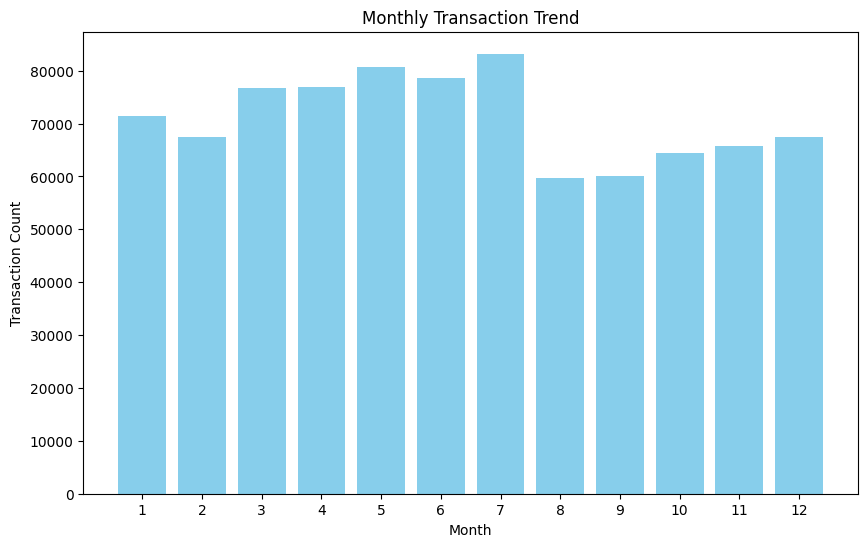

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_transaction_count.index, monthly_transaction_count.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Monthly Transaction Trend')
plt.xticks(monthly_transaction_count.index)  # Set x-axis ticks to be the months
plt.show()

In [ ]:
df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at'])
df_transaction['transaction_year'] = df_transaction['created_at'].dt.year

yearly_transaction_count = df_transaction['transaction_year'].value_counts().sort_index()

print("\nTren Transaksi Tahunan:")
for year, count in yearly_transaction_count.items():
    print(f"Tahun {year}: {count} transaksi")


Tren Transaksi Tahunan:
Tahun 2016: 4833 transaksi
Tahun 2017: 34111 transaksi
Tahun 2018: 73127 transaksi
Tahun 2019: 116794 transaksi
Tahun 2020: 172908 transaksi
Tahun 2021: 256216 transaksi
Tahun 2022: 194595 transaksi


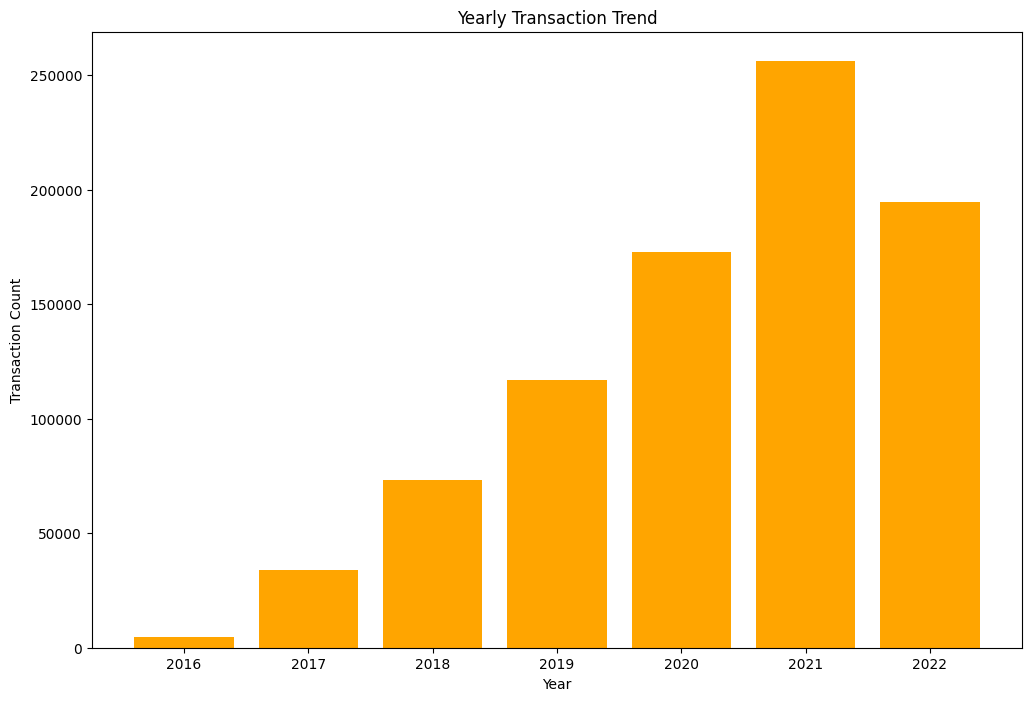

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(yearly_transaction_count.index, yearly_transaction_count.values, color='orange')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Yearly Transaction Trend')
plt.xticks(yearly_transaction_count.index)  # Set x-axis ticks to be the years
plt.show()

In [ ]:
df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at'])
df_transaction['transaction_month'] = df_transaction['created_at'].dt.month
df_transaction['transaction_year'] = df_transaction['created_at'].dt.year

monthly_transaction_count = df_transaction.groupby(['transaction_year', 'transaction_month']).size().reset_index(name='transaction_count')
monthly_transaction_pivot = monthly_transaction_count.pivot('transaction_year', 'transaction_month', 'transaction_count')

print("Tren Transaksi Bulanan dan Tahunan:")
for index, row in monthly_transaction_count.iterrows():
    print(f"Bulan ke-{row['transaction_month']} tahun {row['transaction_year']}: {row['transaction_count']} transaksi")

Tren Transaksi Bulanan dan Tahunan:
Bulan ke-6 tahun 2016: 1 transaksi
Bulan ke-7 tahun 2016: 296 transaksi
Bulan ke-8 tahun 2016: 547 transaksi
Bulan ke-9 tahun 2016: 717 transaksi
Bulan ke-10 tahun 2016: 989 transaksi
Bulan ke-11 tahun 2016: 1157 transaksi
Bulan ke-12 tahun 2016: 1126 transaksi
Bulan ke-1 tahun 2017: 1530 transaksi
Bulan ke-2 tahun 2017: 1601 transaksi
Bulan ke-3 tahun 2017: 1935 transaksi
Bulan ke-4 tahun 2017: 2127 transaksi
Bulan ke-5 tahun 2017: 2333 transaksi
Bulan ke-6 tahun 2017: 2316 transaksi
Bulan ke-7 tahun 2017: 3316 transaksi
Bulan ke-8 tahun 2017: 3225 transaksi
Bulan ke-9 tahun 2017: 3485 transaksi
Bulan ke-10 tahun 2017: 3969 transaksi
Bulan ke-11 tahun 2017: 4009 transaksi
Bulan ke-12 tahun 2017: 4265 transaksi
Bulan ke-1 tahun 2018: 4533 transaksi
Bulan ke-2 tahun 2018: 4368 transaksi
Bulan ke-3 tahun 2018: 5035 transaksi
Bulan ke-4 tahun 2018: 5325 transaksi
Bulan ke-5 tahun 2018: 5563 transaksi
Bulan ke-6 tahun 2018: 5440 transaksi
Bulan ke-7 tahu

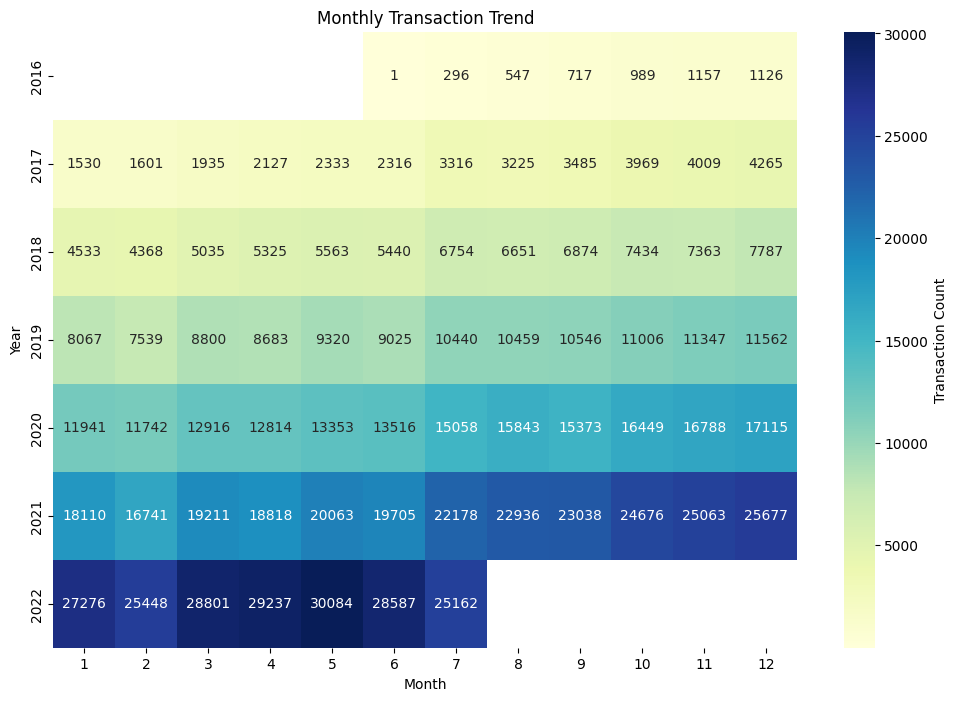

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_transaction_pivot, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Transaction Count'})
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly Transaction Trend')
plt.show()

In [ ]:
# Membuat DataFrame failed_transactions dengan data transaksi yang memiliki status 'Failed'
failed_transactions = df_transaction[df_transaction['payment_status'] == 'Failed']

# Memberi asumsi alasan kegagalan transaksi
failed_transactions['failure_reason'] = 'Unknown'
failed_transactions.loc[failed_transactions['promo_amount'] > 0, 'failure_reason'] = 'Promo Code Issue'
failed_transactions.loc[failed_transactions['shipment_fee'] > 0, 'failure_reason'] = 'Shipment Fee Issue'
failed_transactions.loc[failed_transactions['item_price'] == 0, 'failure_reason'] = 'Zero Item Price'

# Menghitung jumlah alasan kegagalan yang mungkin
failure_reason_counts = failed_transactions['failure_reason'].value_counts()
print("Counts of failure reasons for Failed Transactions:")
print(failure_reason_counts)

Counts of failure reasons for Failed Transactions:
Shipment Fee Issue    27058
Unknown                5897
Promo Code Issue       3665
Name: failure_reason, dtype: int64


In [ ]:
df_transaction

created_at  customer_id  \
0      2018-07-29 15:22:01.458193+00:00         5868   
1      2018-07-30 12:40:22.365620+00:00         4774   
2      2018-09-15 11:51:17.365620+00:00         4774   
3      2018-11-01 11:23:48.365620+00:00         4774   
4      2018-12-18 11:20:30.365620+00:00         4774   
...                                 ...          ...   
852579 2021-09-21 22:10:05.074873+00:00        25121   
852580 2021-12-09 07:35:18.222046+00:00        34829   
852581 2021-12-11 01:20:36.944593+00:00        99645   
852582 2019-12-18 11:01:09.623382+00:00        87319   
852583 2019-12-19 12:47:14.701215+00:00        58180   

                                  booking_id  \
0       186e2bee-0637-4710-8981-50c2d737bc42   
1       caadb57b-e808-4f94-9e96-8a7d4c9898db   
2       6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
3       f5e530a7-4350-4cd1-a3bc-525b5037bcab   
4       0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2   
...                                      ...   
852579  66f02fa4-c62e-497a-8b6e-be239009b50a   
852580  ccde6b83-ee42-4cce-b2cd-976574886eac   
852581  5bcd3434-1dc6-44bb-ae63-fd19714cbd6c   
852582  af7f291a-b01b-4bfd-89a9-237b16368b15   
852583  b242e188-5f94-4448-a038-c5865842374b   

                                  session_id payment_method payment_status  \
0       3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card        Success   
1       2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card        Success   
2       93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO        Success   
3       bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card        Success   
4       df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card        Success   
...                                      ...            ...            ...   
852579  484eecde-9f4a-42de-a8df-7ce6668101f4     Debit Card         Failed   
852580  954e1211-4d45-4d0b-ba84-53e80119592c            OVO        Success   
852581  e6e6c108-abd0-49a2-b0a5-691117f9cfe1    Credit Card        Success   
852582  bb6e5426-a3f3-426a-b99d-79173eaa234b    Credit Card        Success   
852583  5e3183df-198b-40e0-b861-27ef694a832a          Gopay        Success   

        promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0               1415  WEEKENDSERU         10000  2018-08-03T05:07:24.812676Z   
1                  0          NaN         10000  2018-08-03T01:29:03.415705Z   
2                  0          NaN         10000  2018-09-18T08:41:49.422380Z   
3                  0          NaN             0  2018-11-05T17:42:27.954235Z   
4                  0          NaN             0  2018-12-23T17:24:07.361785Z   
...              ...          ...           ...                          ...   
852579             0          NaN             0  2021-09-27T00:43:40.992167Z   
852580          5010       AZ2022         10000  2021-12-12T07:52:44.803822Z   
852581          2181  WEEKENDSERU          5000  2021-12-12T13:28:22.848703Z   
852582          4503       AZ2022             0  2019-12-23T22:56:46.831720Z   
852583          4724      BUYMORE         10000  2019-12-23T06:02:05.828334Z   

        shipment_location_lat  shipment_location_long  total_amount  \
0                   -8.227893              111.969107        199832   
1                    3.013470              107.802514        155526   
2                   -2.579428              115.743885        550696   
3                   -3.602334              120.363824        271012   
4                   -3.602334              120.363824        198753   
...                       ...                     ...           ...   
852579              -6.869535              111.077145        226820   
852580              -8.677264              115.176947        359203   
852581              -6.185498              106.831093       1158159   
852582              -7.155977              110.891858        184143   
852583              -6.155983              106.723535        365963   

        product_id  quantity

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   payment_method          852584 non-null  object             
 5   payment_status          852584 non-null  object             
 6   promo_amount            852584 non-null  int64              
 7   promo_code              326536 non-null  object             
 8   shipment_fee            852584 non-null  int64              
 9   shipment_date_limit     852584 non-null  object             
 10  shipment_location_lat   852584 non-null  float64            
 11  shipment_location_long  85

### Missing values checking

In [ ]:
df_transaction.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
transaction_month              0
transaction_year               0
dtype: int64

In [ ]:
# Membuat fungsi untuk mengganti nilai NaN di kolom 'promo_code'
def handle_missing_promo(row):
    if pd.isna(row['promo_code']) and row['promo_amount'] == 0:
        return "No Promo"
    else:
        return row['promo_code']

df_transaction['promo_code'] = df_transaction.apply(handle_missing_promo, axis=1)

In [ ]:
df_transaction[['promo_code', 'promo_amount']].sample(10)

promo_code  promo_amount
62237        No Promo          0.00
238606       No Promo          0.00
40112        No Promo          0.00
321205       No Promo          0.00
327085       No Promo          0.00
831884    WEEKENDSERU       4654.00
687478       No Promo          0.00
675221       No Promo          0.00
775898       No Promo          0.00
168240  WEEKENDMANTAP       7077.00

In [ ]:
df_transaction.isnull().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
quantity                  0
item_price                0
transaction_month         0
transaction_year          0
dtype: int64

### Duplicate Data

In [ ]:
# Menampilkan baris-baris yang memiliki duplikasi, kecuali kolom 'product_metadata'
duplicates = df_transaction[df_transaction.duplicated(subset=df_transaction.columns.difference(['product_metadata']), keep=False)]

print(duplicates.head())

Empty DataFrame
Columns: [created_at, customer_id, booking_id, session_id, payment_method, payment_status, promo_amount, promo_code, shipment_fee, shipment_date_limit, shipment_location_lat, shipment_location_long, total_amount, product_id, quantity, item_price, transaction_month, transaction_year]
Index: []


### Check Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', '{:.2f}'.format)

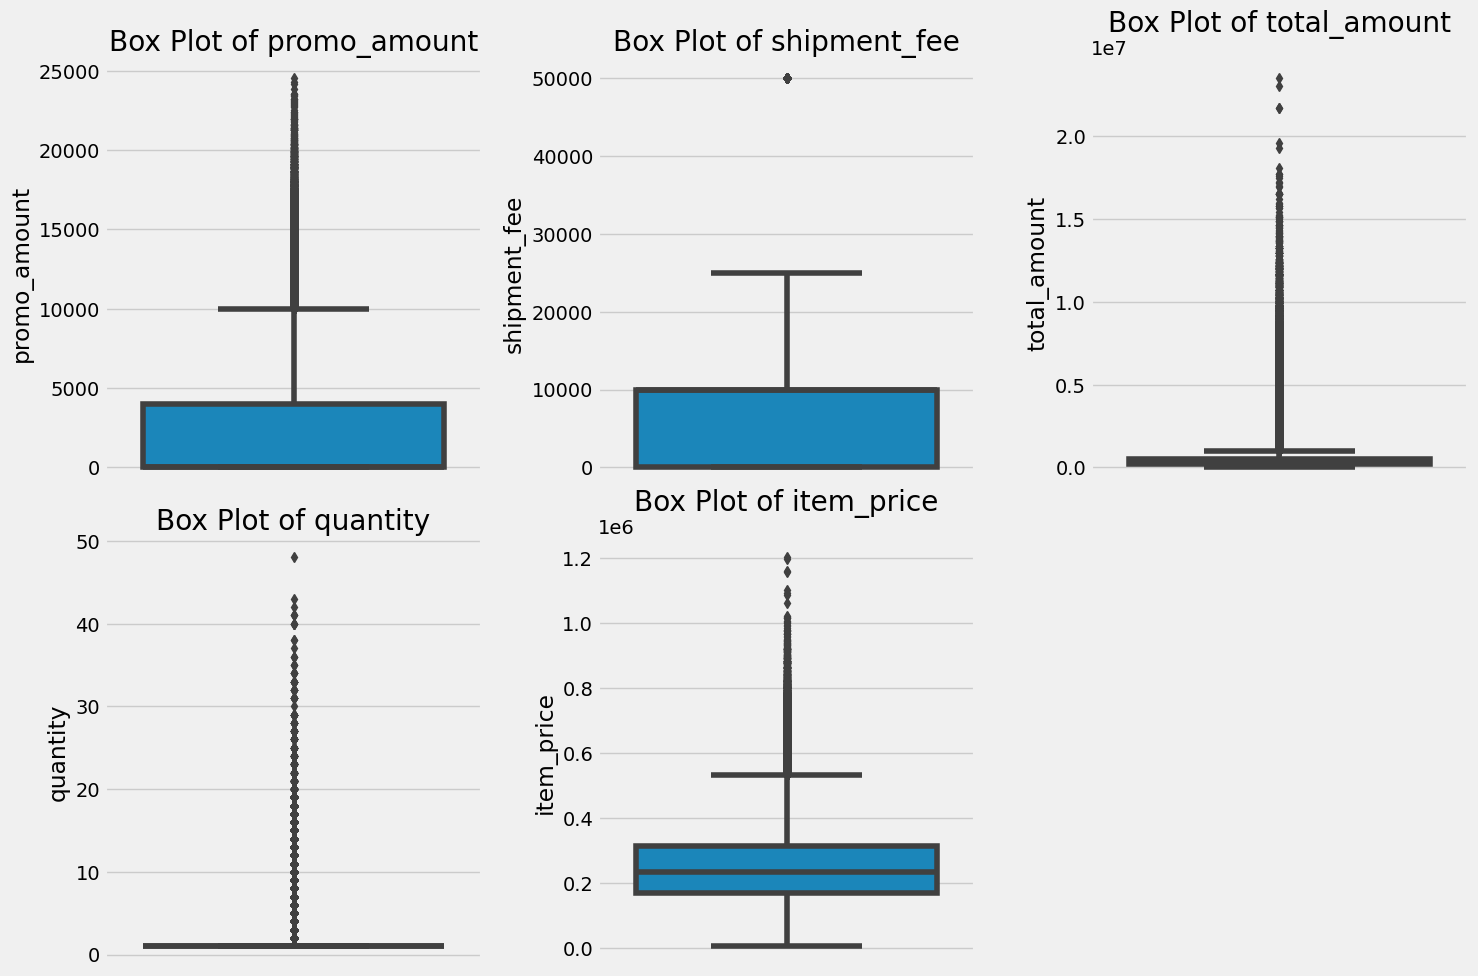

In [ ]:
numeric_columns = df_transaction.drop(columns=['customer_id', 'product_id', 'shipment_location_lat', 'shipment_location_long', 'transaction_year', 'transaction_month']).select_dtypes(include=['int', 'float']).columns

columns_per_row = 3

num_rows = (len(numeric_columns) - 1) // columns_per_row + 1

fig, axs = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(15, 5*num_rows))

for i, column in enumerate(numeric_columns):
    row = i // columns_per_row
    col = i % columns_per_row
    sns.boxplot(y=df_transaction[column], ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {column}')

for i in range(len(numeric_columns), num_rows * columns_per_row):
    fig.delaxes(axs[i // columns_per_row, i % columns_per_row])

plt.tight_layout()
plt.show()

In [ ]:
numeric_columns = df_transaction.drop(columns=['customer_id', 'product_id', 'shipment_location_lat', 'shipment_location_long', 'transaction_year', 'transaction_month']).select_dtypes(include=['int', 'float']).columns

for column in numeric_columns:
    Q1 = df_transaction[column].quantile(0.25)
    Q3 = df_transaction[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_transaction[column] = np.where(df_transaction[column] < lower_limit, lower_limit, df_transaction[column])
    df_transaction[column] = np.where(df_transaction[column] > upper_limit, upper_limit, df_transaction[column])

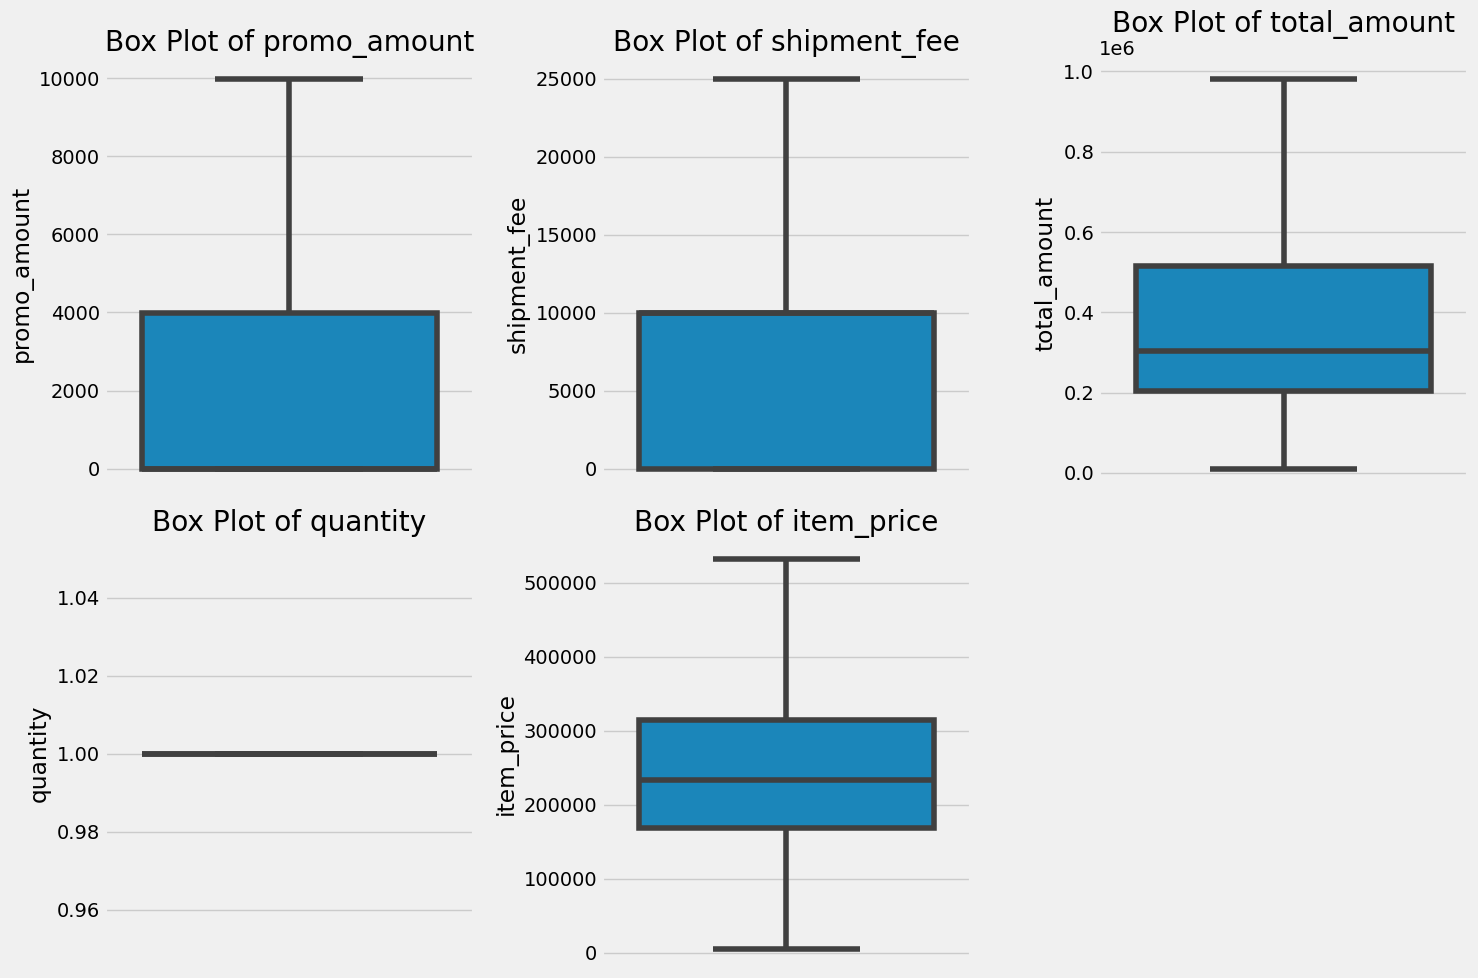

In [ ]:
numeric_columns = df_transaction.drop(columns=['customer_id', 'product_id', 'shipment_location_lat', 'shipment_location_long', 'transaction_year', 'transaction_month']).select_dtypes(include=['int', 'float']).columns

columns_per_row = 3

num_rows = (len(numeric_columns) - 1) // columns_per_row + 1

fig, axs = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(15, 5*num_rows))

for i, column in enumerate(numeric_columns):
    row = i // columns_per_row
    col = i % columns_per_row
    sns.boxplot(y=df_transaction[column], ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {column}')

for i in range(len(numeric_columns), num_rows * columns_per_row):
    fig.delaxes(axs[i // columns_per_row, i % columns_per_row])

plt.tight_layout()
plt.show()

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   payment_method          852584 non-null  object             
 5   payment_status          852584 non-null  object             
 6   promo_amount            852584 non-null  float64            
 7   promo_code              852584 non-null  object             
 8   shipment_fee            852584 non-null  float64            
 9   shipment_date_limit     852584 non-null  object             
 10  shipment_location_lat   852584 non-null  float64            
 11  shipment_location_long  85

# **Feature Engineering**

In [ ]:
df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [ ]:
df_transaction['OrderYearMonth'] = df_transaction['created_at'].map(lambda date: 100*date.year + date.month)
df_transaction['Date'] = df_transaction['created_at'].dt.strftime('%Y-%m')
df_transaction['Year'] = df_transaction['created_at'].dt.strftime('%Y')
df_transaction['Month'] = df_transaction['created_at'].dt.strftime('%m')
df_transaction['Week'] = df_transaction['created_at'].dt.strftime('%U')
df_transaction['Day'] = df_transaction['created_at'].dt.strftime('%d')

In [ ]:
df_transaction['revenue'] = (df_transaction['quantity'] * df_transaction['item_price']) + df_transaction['shipment_fee'] - df_transaction['promo_amount']

Tren Transaksi Mingguan:
Minggu ke-26 tahun 2016: 9 transaksi
Minggu ke-27 tahun 2016: 58 transaksi
Minggu ke-28 tahun 2016: 62 transaksi
Minggu ke-29 tahun 2016: 68 transaksi
Minggu ke-30 tahun 2016: 78 transaksi
Minggu ke-31 tahun 2016: 90 transaksi
Minggu ke-32 tahun 2016: 123 transaksi
Minggu ke-33 tahun 2016: 139 transaksi
Minggu ke-34 tahun 2016: 131 transaksi
Minggu ke-35 tahun 2016: 139 transaksi
Minggu ke-36 tahun 2016: 172 transaksi
Minggu ke-37 tahun 2016: 172 transaksi
Minggu ke-38 tahun 2016: 178 transaksi
Minggu ke-39 tahun 2016: 186 transaksi
Minggu ke-40 tahun 2016: 216 transaksi
Minggu ke-41 tahun 2016: 210 transaksi
Minggu ke-42 tahun 2016: 191 transaksi
Minggu ke-43 tahun 2016: 226 transaksi
Minggu ke-44 tahun 2016: 270 transaksi
Minggu ke-45 tahun 2016: 252 transaksi
Minggu ke-46 tahun 2016: 283 transaksi
Minggu ke-47 tahun 2016: 273 transaksi
Minggu ke-48 tahun 2016: 279 transaksi
Minggu ke-49 tahun 2016: 228 transaksi
Minggu ke-50 tahun 2016: 263 transaksi
Minggu 

Text(0.5, 1.0, 'Weekly Transaction Trend')

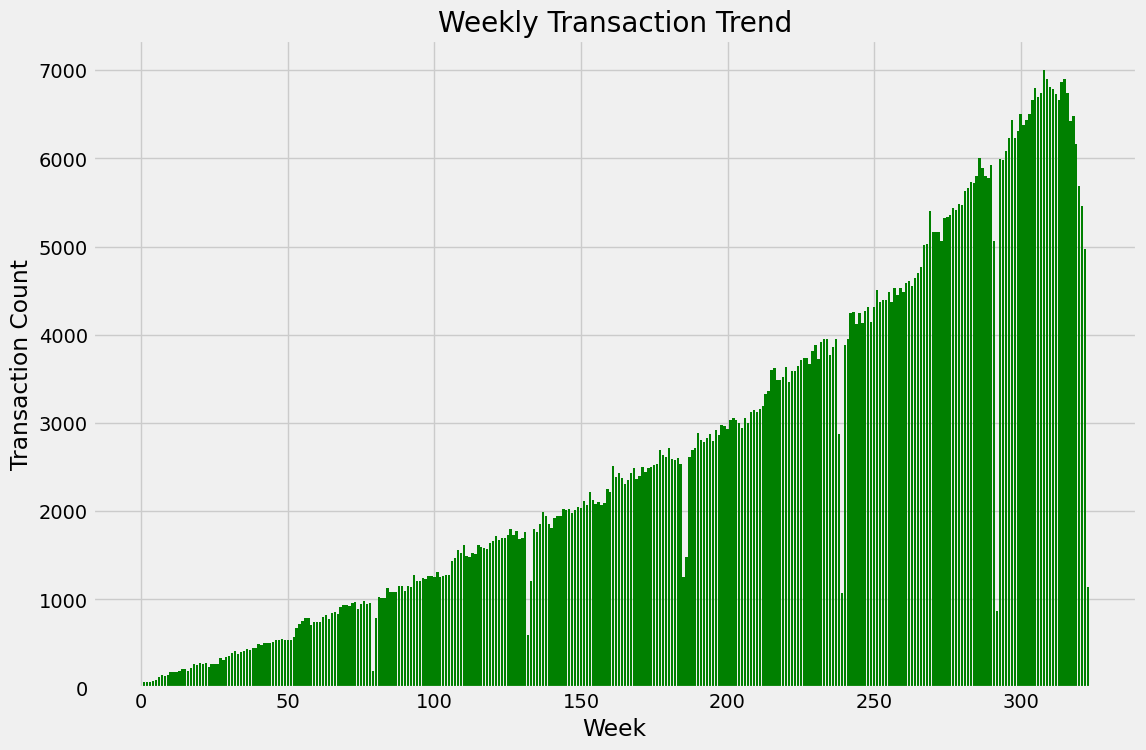

In [ ]:
weekly_transaction_count = df_transaction.groupby(['transaction_year', 'Week']).size().reset_index(name='transaction_count')

print("Tren Transaksi Mingguan:")
for index, row in weekly_transaction_count.iterrows():
    print(f"Minggu ke-{row['Week']} tahun {row['transaction_year']}: {row['transaction_count']} transaksi")

# create a bar plot for weekly transactions
plt.figure(figsize=(12, 8))
plt.bar(weekly_transaction_count.index, weekly_transaction_count['transaction_count'], color='green')
plt.xlabel('Week')
plt.ylabel('Transaction Count')
plt.title('Weekly Transaction Trend')


In [ ]:
dt_rev = df_transaction.groupby(['Year', 'Month']).agg(
    total_shipment=pd.NamedAgg(column='shipment_fee', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum'),
    total_item_price=pd.NamedAgg(column='item_price', aggfunc='sum'),
    total_promo_amount=pd.NamedAgg(column='promo_amount', aggfunc='sum'),
    revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).reset_index()

In [ ]:
dt_rev['Month'][dt_rev['Month']=='01'] ='Jan'
dt_rev['Month'][dt_rev['Month']=='02'] ='Feb'
dt_rev['Month'][dt_rev['Month']=='03'] ='Mar'
dt_rev['Month'][dt_rev['Month']=='04'] ='Apr'
dt_rev['Month'][dt_rev['Month']=='05'] ='May'
dt_rev['Month'][dt_rev['Month']=='06'] ='Jun'
dt_rev['Month'][dt_rev['Month']=='07'] ='Jul'
dt_rev['Month'][dt_rev['Month']=='08'] ='Aug'
dt_rev['Month'][dt_rev['Month']=='09'] ='Sep'
dt_rev['Month'][dt_rev['Month']=='10'] ='Oct'
dt_rev['Month'][dt_rev['Month']=='11'] ='Nov'
dt_rev['Month'][dt_rev['Month']=='12'] ='Dec'

In [ ]:
dt_rev.head()

Year Month  total_shipment  total_quantity  total_item_price  \
0  2016   Jun        10000.00            1.00         210265.00   
1  2016   Jul      2385000.00          296.00       75007902.12   
2  2016   Aug      4470000.00          547.00      135871116.12   
3  2016   Sep      5975000.00          717.00      181242736.00   
4  2016   Oct      7750000.00          989.00      241698461.62   

   total_promo_amount      revenue  
0                0.00    220265.00  
1           937629.00  76455273.12  
2          1397463.50 138943652.62  
3          1729749.00 185487987.00  
4          2201484.50 247246977.12

In [ ]:
dt_rev['created_at'] = df_transaction['created_at']
dt_rev['yearmonth'] = dt_rev['Year'] + ' ' + dt_rev['Month']

In [ ]:
dt_rev.head(10)

Year Month  total_shipment  total_quantity  total_item_price  \
0  2016   Jun        10000.00            1.00         210265.00   
1  2016   Jul      2385000.00          296.00       75007902.12   
2  2016   Aug      4470000.00          547.00      135871116.12   
3  2016   Sep      5975000.00          717.00      181242736.00   
4  2016   Oct      7750000.00          989.00      241698461.62   
5  2016   Nov      9660000.00         1157.00      281126379.50   
6  2016   Dec      9385000.00         1126.00      282654994.00   
7  2017   Jan     12580000.00         1530.00      380477999.12   
8  2017   Feb     14025000.00         1601.00      394974889.50   
9  2017   Mar     16810000.00         1935.00      482809821.00   

   total_promo_amount      revenue                       created_at yearmonth  
0                0.00    220265.00 2018-07-29 15:22:01.458193+00:00  2016 Jun  
1           937629.00  76455273.12 2018-07-30 12:40:22.365620+00:00  2016 Jul  
2          1397463.50 138943652.62 2018-09-15 11:51:17.365620+00:00  2016 Aug  
3          1729749.00 185487987.00 2018-11-01 11:23:48.365620+00:00  2016 Sep  
4          2201484.50 247246977.12 2018-12-18 11:20:30.365620+00:00  2016 Oct  
5          2704797.00 288081582.50 2019-02-03 11:25:55.365620+00:00  2016 Nov  
6          2812266.50 289227727.50 2019-03-22 11:53:02.365620+00:00  2016 Dec  
7          3569068.50 389488930.62 2019-05-08 11:29:21.365620+00:00  2017 Jan  
8          3603729.00 405396160.50 2019-06-24 12:08:52.365620+00:00  2017 Feb  
9          4328394.50 495291426.50 2019-08-10 12:14:24.365620+00:00  2017 Mar

In [ ]:
dt_rev.describe()

total_shipment  total_quantity  total_item_price  total_promo_amount  \
count           74.00           74.00             74.00               74.00   
mean      96529324.32        11521.41     2865657588.03         22967057.74   
std       72380281.08         8629.98     2149374599.88         14788263.28   
min          10000.00            1.00         210265.00                0.00   
25%       35935000.00         4290.75     1070555845.44         10013891.50   
50%       82742500.00         9880.00     2453353155.88         22785696.25   
75%      143027500.00        17033.25     4262337366.62         34373875.00   
max      253100000.00        30084.00     7485832807.00         51066382.50   

            revenue  
count         74.00  
mean  2939219854.62  
std   2207191718.36  
min       220265.00  
25%   1096726953.94  
50%   2513754959.62  
75%   4370990991.62  
max   7687866424.50

In [ ]:
dt_rev['date'] = pd.to_datetime(df_transaction['Date'])

## Kategori Harian

In [ ]:
# Harian
daily = df_transaction.groupby(['Year', 'Month', 'Day']).agg(
    total_shipment=pd.NamedAgg(column='shipment_fee', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum'),
    total_item_price=pd.NamedAgg(column='item_price', aggfunc='sum'),
    total_promo_amount=pd.NamedAgg(column='promo_amount', aggfunc='sum')
).reset_index()

In [ ]:
#Mengubah tipe total_quantity menjadi int sesuai jenisnya
daily['total_quantity'] = daily['total_quantity'].astype(int)

In [ ]:
daily.head()

Year Month Day  total_shipment  total_quantity  total_item_price  \
0  2016    06  30        10000.00               1         210265.00   
1  2016    07  01        35000.00               3         729001.00   
2  2016    07  02        20000.00               5        1292586.00   
3  2016    07  03        65000.00               8        1514078.00   
4  2016    07  04       105000.00              13        3799777.00   

   total_promo_amount  
0                0.00  
1             6053.00  
2            11127.00  
3            30860.00  
4            61412.50

In [ ]:
daily.tail()

Year Month Day  total_shipment  total_quantity  total_item_price  \
2218  2022    07  27      5765000.00             694      171812145.50   
2219  2022    07  28      5070000.00             602      146733659.50   
2220  2022    07  29      4115000.00             467      117355329.62   
2221  2022    07  30      5855000.00             647      159182210.62   
2222  2022    07  31      9440000.00            1145      280945678.00   

      total_promo_amount  
2218          1034165.00  
2219           895217.50  
2220           764670.50  
2221           864487.00  
2222          1352755.00

In [ ]:
# Tentukan start_date dan end_date berdasarkan kolom 'Year', 'Month', dan 'Day'
start_date = pd.to_datetime(daily[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)).min()
end_date = pd.to_datetime(daily[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)).max()

# Buat rentang tanggal yang diharapkan
expected_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Temukan tanggal yang hilang
missing_dates = expected_dates[~expected_dates.isin(pd.to_datetime(daily[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)))]
print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [ ]:
# Menambahakan kolom baru bernama revenue dan yearmonth
daily['revenue'] = (daily['total_quantity'] * daily['total_item_price']) + daily['total_shipment'] - daily['total_promo_amount']
daily['yearmonth'] = daily['Year'] + ' ' + daily['Month']

In [ ]:
daily

Year Month Day  total_shipment  total_quantity  total_item_price  \
0     2016    06  30        10000.00               1         210265.00   
1     2016    07  01        35000.00               3         729001.00   
2     2016    07  02        20000.00               5        1292586.00   
3     2016    07  03        65000.00               8        1514078.00   
4     2016    07  04       105000.00              13        3799777.00   
...    ...   ...  ..             ...             ...               ...   
2218  2022    07  27      5765000.00             694      171812145.50   
2219  2022    07  28      5070000.00             602      146733659.50   
2220  2022    07  29      4115000.00             467      117355329.62   
2221  2022    07  30      5855000.00             647      159182210.62   
2222  2022    07  31      9440000.00            1145      280945678.00   

      total_promo_amount         revenue yearmonth  
0                   0.00       220265.00   2016 06  
1                6053.00      2215950.00   2016 07  
2               11127.00      6471803.00   2016 07  
3               30860.00     12146764.00   2016 07  
4               61412.50     49440688.50   2016 07  
...                  ...             ...       ...  
2218          1034165.00 119242359812.00   2022 07  
2219           895217.50  88337837801.50   2022 07  
2220           764670.50  54808289264.38   2022 07  
2221           864487.00 102995880787.38   2022 07  
2222          1352755.00 321690888555.00   2022 07  

[2223 rows x 9 columns]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalkan daily adalah DataFrame Anda
# Jika kolom 'Year', 'Month', 'Day' belum dalam format datetime, ubahlah terlebih dahulu
daily['date'] = pd.to_datetime(daily[['Year', 'Month', 'Day']])

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
plt.xticks(rotation=-45)

# make a plot for total_quantity
ax.plot(daily['date'], daily['total_quantity'], color="red", marker="o")

# set x-axis label
ax.set_xlabel("Daily Year", fontsize=80)

# set y-axis label for total_quantity
ax.set_ylabel("order_count", color="red", fontsize=80)

# set title
ax.set_title('Daily Performance', fontsize=150)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# make a plot with different y-axis using the second axis object for total_revenue
ax2.plot(daily['date'], daily['revenue'], color="blue", marker="o")

# set y-axis label for total_revenue
ax2.set_ylabel("revenue_generated", color="blue", fontsize=80)

# set figure size
fig.set_size_inches(100, 100)

# set fontsize and rotation for x-axis ticks
# plt.xticks(fontsize=80, rotation=45)
plt.xticks(daily['Year'], fontsize=80)


# set fontsize for y-axis ticks
plt.yticks(fontsize=80)

# show the plot
plt.show()


## Kategori Bulanan

In [ ]:
monthly = df_transaction.groupby(['Year', 'Month']).agg(
    total_shipment=pd.NamedAgg(column='shipment_fee', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum'),
    total_item_price=pd.NamedAgg(column='item_price', aggfunc='sum'),
    total_promo_amount=pd.NamedAgg(column='promo_amount', aggfunc='sum')
).reset_index()

In [ ]:
monthly['total_quantity'] = monthly['total_quantity'].astype(int)

In [ ]:
monthly.head(13)

Year Month  total_shipment  total_quantity  total_item_price  \
0   2016    06        10000.00               1         210265.00   
1   2016    07      2385000.00             296       75007902.12   
2   2016    08      4470000.00             547      135871116.12   
3   2016    09      5975000.00             717      181242736.00   
4   2016    10      7750000.00             989      241698461.62   
5   2016    11      9660000.00            1157      281126379.50   
6   2016    12      9385000.00            1126      282654994.00   
7   2017    01     12580000.00            1530      380477999.12   
8   2017    02     14025000.00            1601      394974889.50   
9   2017    03     16810000.00            1935      482809821.00   
10  2017    04     17890000.00            2127      527921470.38   
11  2017    05     19915000.00            2333      576024433.38   
12  2017    06     19485000.00            2316      577677066.88   

    total_promo_amount  
0                 0.00  
1            937629.00  
2           1397463.50  
3           1729749.00  
4           2201484.50  
5           2704797.00  
6           2812266.50  
7           3569068.50  
8           3603729.00  
9           4328394.50  
10          5151646.00  
11          5302587.00  
12          5531450.50

In [ ]:
# Tentukan start_date dan end_date berdasarkan kolom 'Year', 'Month', dan 'Day'
start_date = pd.to_datetime(monthly[['Year', 'Month']].astype(str).agg('-'.join, axis=1)).min()
end_date = pd.to_datetime(monthly[['Year', 'Month']].astype(str).agg('-'.join, axis=1)).max()

# Buat rentang tanggal yang diharapkan
expected_dates = pd.date_range(start=start_date, end=end_date, freq='MS')

# Temukan tanggal yang hilang
missing_dates = expected_dates[~expected_dates.isin(pd.to_datetime(monthly[['Year', 'Month']].astype(str).agg('-'.join, axis=1)))]
print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')


In [ ]:
monthly['Month'][monthly['Month']=='01'] ='Jan'
monthly['Month'][monthly['Month']=='02'] ='Feb'
monthly['Month'][monthly['Month']=='03'] ='Mar'
monthly['Month'][monthly['Month']=='04'] ='Apr'
monthly['Month'][monthly['Month']=='05'] ='May'
monthly['Month'][monthly['Month']=='06'] ='Jun'
monthly['Month'][monthly['Month']=='07'] ='Jul'
monthly['Month'][monthly['Month']=='08'] ='Aug'
monthly['Month'][monthly['Month']=='09'] ='Sep'
monthly['Month'][monthly['Month']=='10'] ='Oct'
monthly['Month'][monthly['Month']=='11'] ='Nov'
monthly['Month'][monthly['Month']=='12'] ='Dec'

In [ ]:
monthly['revenue'] = (monthly['total_quantity'] * monthly['total_item_price']) + monthly['total_shipment'] - monthly['total_promo_amount']
monthly['yearmonth'] = monthly['Year'] + ' ' + monthly['Month']

In [ ]:
monthly

Year Month  total_shipment  total_quantity  total_item_price  \
0   2016   Jun        10000.00               1         210265.00   
1   2016   Jul      2385000.00             296       75007902.12   
2   2016   Aug      4470000.00             547      135871116.12   
3   2016   Sep      5975000.00             717      181242736.00   
4   2016   Oct      7750000.00             989      241698461.62   
..   ...   ...             ...             ...               ...   
69  2022   Mar    240490000.00           28801     7197932527.88   
70  2022   Apr    244705000.00           29237     7276004521.88   
71  2022   May    253100000.00           30084     7485832807.00   
72  2022   Jun    239410000.00           28587     7121369356.75   
73  2022   Jul    210705000.00           25162     6244074000.12   

    total_promo_amount            revenue yearmonth  
0                 0.00          220265.00  2016 Jun  
1            937629.00     22203786400.00  2016 Jul  
2           1397463.50     74324573056.88  2016 Aug  
3           1729749.00    129955286963.00  2016 Sep  
4           2201484.50    239045327062.62  2016 Oct  
..                 ...                ...       ...  
69         48664904.00 207307846560423.88  2022 Mar  
70         49541231.00 212728739369828.38  2022 Apr  
71         51066382.50 225203996199405.50  2022 May  
72         46447563.00 203578778763849.25  2022 Jun  
73         36397264.50 157113564298880.75  2022 Jul  

[74 rows x 8 columns]

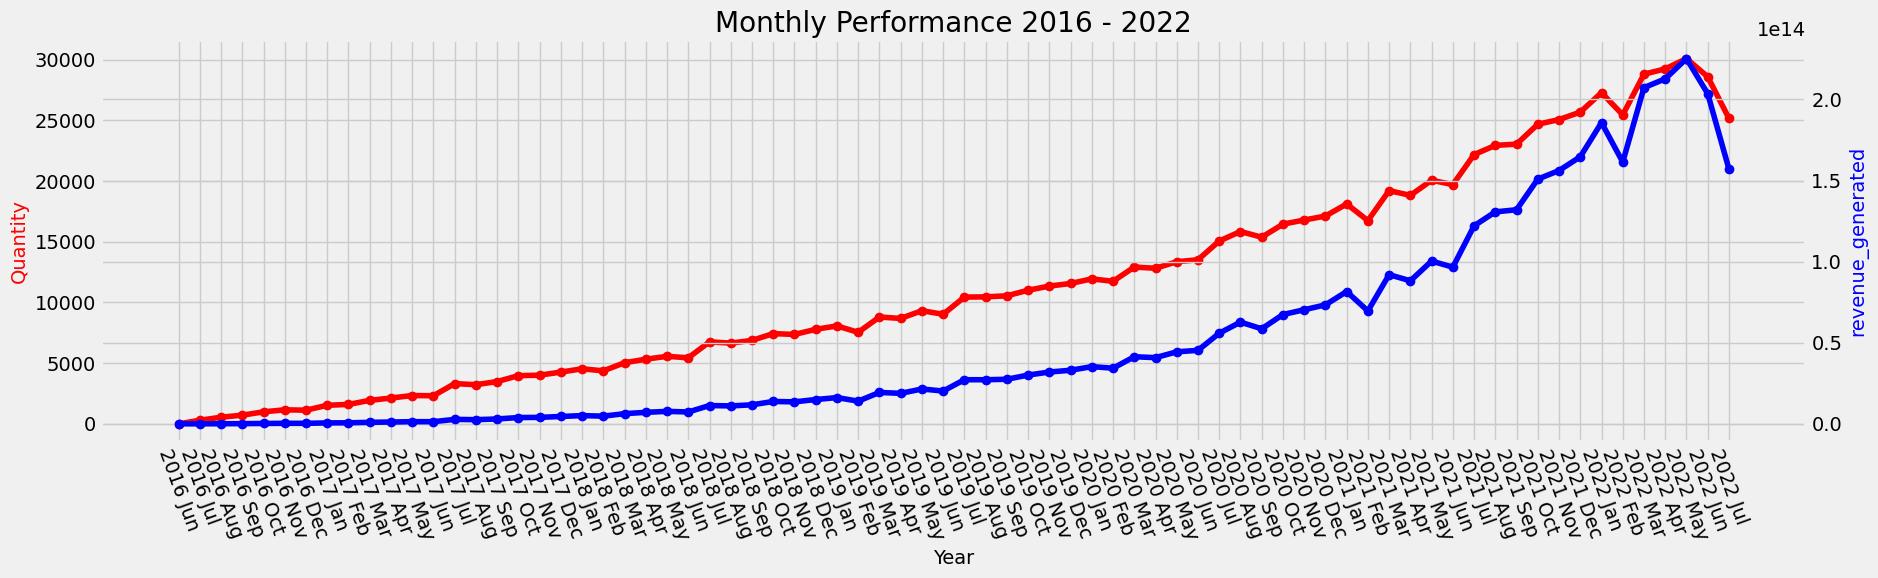

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.xticks(rotation=-70)
# make a plot
ax.plot(monthly.yearmonth, monthly.total_quantity, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Quantity",color="red",fontsize=14)
ax.set_title('Monthly Performance 2016 - 2022')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(monthly.yearmonth, monthly.revenue,color="blue",marker="o")
ax2.set_ylabel("revenue_generated",color="blue",fontsize=14)
fig.set_size_inches(19,6)
plt.tight_layout()
plt.show()

##**Kategori Pertahun**

In [ ]:
# Kelompokkan data per hari dan menghitung total
yearly = dt_rev.groupby('Year').agg(
                            total_shipment = pd.NamedAgg(column = 'total_shipment', aggfunc=sum),
                            total_quantity = pd.NamedAgg(column = 'total_quantity', aggfunc=sum),
                            total_item_price = pd.NamedAgg(column = 'total_item_price', aggfunc=sum),
                            total_promo_amount = pd.NamedAgg(column = 'total_promo_amount', aggfunc=sum),
                            revenue = pd.NamedAgg(column = 'revenue', aggfunc=sum)
                            ).reset_index()

In [ ]:
yearly

Year  total_shipment  total_quantity  total_item_price  total_promo_amount  \
0  2016     39635000.00         4833.00     1197811854.38         11783389.50   
1  2017    286455000.00        34111.00     8471485364.00         79852326.50   
2  2018    611755000.00        73127.00    18177540832.38        166665939.00   
3  2019    976260000.00       116794.00    28998352538.38        270575101.00   
4  2020   1448995000.00       172908.00    43001741375.00        367612881.00   
5  2021   2149310000.00       256216.00    63735840867.38        479544128.00   
6  2022   1630760000.00       194595.00    48475888682.62        323528507.50   

         revenue  
0  1225663464.88  
1  8678088037.50  
2 18622629893.38  
3 29704037437.38  
4 44083123494.00  
5 65405606739.38  
6 49783120175.12

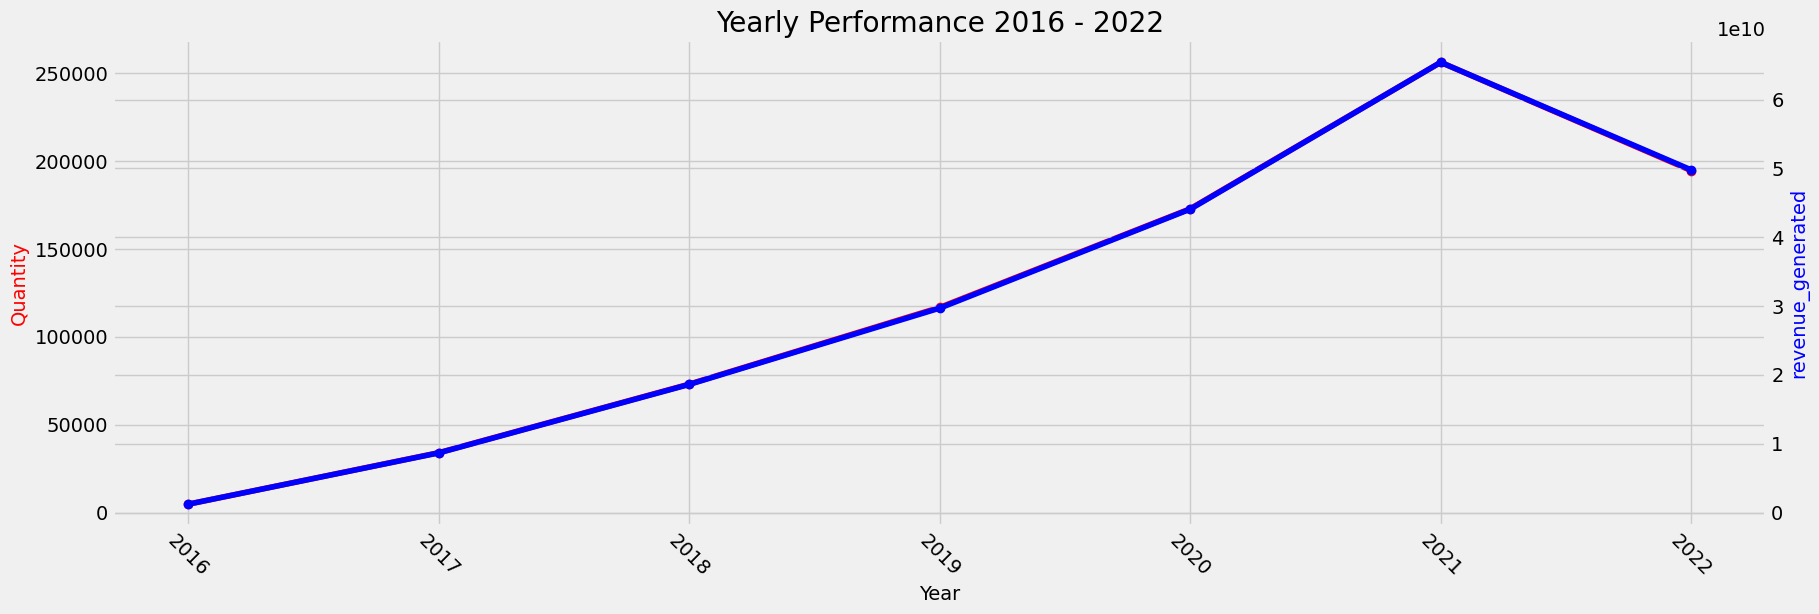

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.xticks(rotation=-45)
# make a plot
ax.plot(yearly.Year, yearly.total_quantity, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Quantity",color="red",fontsize=14)
ax.set_title('Yearly Performance 2016 - 2022')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(yearly.Year, yearly.revenue,color="blue",marker="o")
ax2.set_ylabel("revenue_generated",color="blue",fontsize=14)
fig.set_size_inches(19,6)
plt.show()

In [ ]:
master_dataset = df_transaction[['customer_id','product_id', 'booking_id', 'created_at', 'quantity', 'item_price', 'shipment_fee', 'promo_amount', 'total_amount', 'payment_method', 'payment_status', 'promo_code']].merge(df_customer[['customer_id', 'gender', 'birthdate', 'device_type', 'home_location', 'home_country']], on="customer_id", how="inner")
master_dataset = master_dataset.merge(df_product[['product_id', 'masterCategory', 'subCategory', 'articleType', 'season']], on="product_id", how="inner")

In [ ]:
master_dataset.head()

customer_id  product_id                            booking_id  \
0         5868       54728  186e2bee-0637-4710-8981-50c2d737bc42   
1        82831       54728  81f60282-96c5-45f5-8a24-18e8111ccd08   
2        47013       54728  a144e124-1ad6-425b-9f64-b01f05c697ff   
3        17135       54728  e620a19d-982d-4fc2-9715-29fda7f42269   
4        70185       54728  bbe1053a-9738-4438-bea4-0a3abcaf6afb   

                        created_at  quantity  item_price  shipment_fee  \
0 2018-07-29 15:22:01.458193+00:00      1.00   191247.00      10000.00   
1 2021-01-15 19:52:40.793729+00:00      1.00   222512.00      10000.00   
2 2020-06-04 14:54:13.726119+00:00      1.00   245159.00      10000.00   
3 2019-02-05 08:29:50.613535+00:00      1.00   263371.00          0.00   
4 2020-11-04 14:20:44.351064+00:00      1.00   300437.00      10000.00   

   promo_amount  total_amount payment_method  ...   promo_code gender  \
0       1415.00     199832.00     Debit Card  ...  WEEKENDSERU      F   
1          0.00     232512.00            OVO  ...     No Promo      M   
2          0.00     255159.00          Gopay  ...     No Promo      M   
3          0.00     263371.00    Credit Card  ...     No Promo      M   
4          0.00     981065.00          Gopay  ...     No Promo      M   

    birthdate device_type       home_location home_country masterCategory  \
0  2000-08-20     Android        Jakarta Raya    Indonesia       Footwear   
1  2000-12-17     Android  Kalimantan Selatan    Indonesia       Footwear   
2  1998-02-15     Android          Yogyakarta    Indonesia       Footwear   
3  2010-04-04         iOS     Sulawesi Tengah    Indonesia       Footwear   
4  1996-07-20     Android      Sumatera Barat    Indonesia       Footwear   

  subCategory   articleType  season  
0       Shoes  Casual Shoes  Summer  
1       Shoes  Casual Shoes  Summer  
2       Shoes  Casual Shoes  Summer  
3       Shoes  Casual Shoes  Summer  
4       Shoes  Casual Shoes  Summer  

[5 rows x 21 columns]

In [ ]:
# Ubah kolom birthdate menjadi tipe data tanggal
master_dataset['birthdate'] = pd.to_datetime(master_dataset['birthdate'])

# Dapatkan tanggal saat ini
tanggal_sekarang = datetime.now()

# Hitung selisih umur
master_dataset['umur'] = (tanggal_sekarang - master_dataset['birthdate']).astype('<m8[Y]')

In [ ]:
master_dataset['created_at'] = pd.to_datetime(master_dataset['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

master_dataset['quantity'] = master_dataset['quantity'].astype(int)
master_dataset['item_price'] = master_dataset['item_price'].astype(int)
master_dataset['total_amount'] = master_dataset['total_amount'].astype(int)
master_dataset['umur'] = master_dataset['umur'].astype(int)

In [ ]:
master_dataset.head()

customer_id  product_id                            booking_id  \
0         5868       54728  186e2bee-0637-4710-8981-50c2d737bc42   
1        82831       54728  81f60282-96c5-45f5-8a24-18e8111ccd08   
2        47013       54728  a144e124-1ad6-425b-9f64-b01f05c697ff   
3        17135       54728  e620a19d-982d-4fc2-9715-29fda7f42269   
4        70185       54728  bbe1053a-9738-4438-bea4-0a3abcaf6afb   

                        created_at  quantity  item_price  shipment_fee  \
0 2018-07-29 15:22:01.458193+00:00         1      191247      10000.00   
1 2021-01-15 19:52:40.793729+00:00         1      222512      10000.00   
2 2020-06-04 14:54:13.726119+00:00         1      245159      10000.00   
3 2019-02-05 08:29:50.613535+00:00         1      263371          0.00   
4 2020-11-04 14:20:44.351064+00:00         1      300437      10000.00   

   promo_amount  total_amount payment_method  ... gender  birthdate  \
0       1415.00        199832     Debit Card  ...      F 2000-08-20   
1          0.00        232512            OVO  ...      M 2000-12-17   
2          0.00        255159          Gopay  ...      M 1998-02-15   
3          0.00        263371    Credit Card  ...      M 2010-04-04   
4          0.00        981065          Gopay  ...      M 1996-07-20   

  device_type       home_location home_country masterCategory subCategory  \
0     Android        Jakarta Raya    Indonesia       Footwear       Shoes   
1     Android  Kalimantan Selatan    Indonesia       Footwear       Shoes   
2     Android          Yogyakarta    Indonesia       Footwear       Shoes   
3         iOS     Sulawesi Tengah    Indonesia       Footwear       Shoes   
4     Android      Sumatera Barat    Indonesia       Footwear       Shoes   

    articleType  season umur  
0  Casual Shoes  Summer   23  
1  Casual Shoes  Summer   23  
2  Casual Shoes  Summer   25  
3  Casual Shoes  Summer   13  
4  Casual Shoes  Summer   27  

[5 rows x 22 columns]

#**Data Wrangling "Time Series Date"**

In [ ]:
rev_monthly = dt_rev.copy()
rev_monthly = rev_monthly.set_index('yearmonth')
rev_monthly.head(10)

Year Month  total_shipment  total_quantity  total_item_price  \
yearmonth                                                                 
2016 Jun   2016   Jun        10000.00            1.00         210265.00   
2016 Jul   2016   Jul      2385000.00          296.00       75007902.12   
2016 Aug   2016   Aug      4470000.00          547.00      135871116.12   
2016 Sep   2016   Sep      5975000.00          717.00      181242736.00   
2016 Oct   2016   Oct      7750000.00          989.00      241698461.62   
2016 Nov   2016   Nov      9660000.00         1157.00      281126379.50   
2016 Dec   2016   Dec      9385000.00         1126.00      282654994.00   
2017 Jan   2017   Jan     12580000.00         1530.00      380477999.12   
2017 Feb   2017   Feb     14025000.00         1601.00      394974889.50   
2017 Mar   2017   Mar     16810000.00         1935.00      482809821.00   

           total_promo_amount      revenue                       created_at  \
yearmonth                                                                     
2016 Jun                 0.00    220265.00 2018-07-29 15:22:01.458193+00:00   
2016 Jul            937629.00  76455273.12 2018-07-30 12:40:22.365620+00:00   
2016 Aug           1397463.50 138943652.62 2018-09-15 11:51:17.365620+00:00   
2016 Sep           1729749.00 185487987.00 2018-11-01 11:23:48.365620+00:00   
2016 Oct           2201484.50 247246977.12 2018-12-18 11:20:30.365620+00:00   
2016 Nov           2704797.00 288081582.50 2019-02-03 11:25:55.365620+00:00   
2016 Dec           2812266.50 289227727.50 2019-03-22 11:53:02.365620+00:00   
2017 Jan           3569068.50 389488930.62 2019-05-08 11:29:21.365620+00:00   
2017 Feb           3603729.00 405396160.50 2019-06-24 12:08:52.365620+00:00   
2017 Mar           4328394.50 495291426.50 2019-08-10 12:14:24.365620+00:00   

                date  
yearmonth             
2016 Jun  2018-07-01  
2016 Jul  2018-07-01  
2016 Aug  2018-09-01  
2016 Sep  2018-11-01  
2016 Oct  2018-12-01  
2016 Nov  2019-02-01  
2016 Dec  2019-03-01  
2017 Jan  2019-05-01  
2017 Feb  2019-06-01  
2017 Mar  2019-08-01

In [ ]:
rev_monthly = rev_monthly.drop(columns='created_at',axis=1)

In [ ]:
rev_monthly

Year Month  total_shipment  total_quantity  total_item_price  \
yearmonth                                                                 
2016 Jun   2016   Jun        10000.00            1.00         210265.00   
2016 Jul   2016   Jul      2385000.00          296.00       75007902.12   
2016 Aug   2016   Aug      4470000.00          547.00      135871116.12   
2016 Sep   2016   Sep      5975000.00          717.00      181242736.00   
2016 Oct   2016   Oct      7750000.00          989.00      241698461.62   
...         ...   ...             ...             ...               ...   
2022 Mar   2022   Mar    240490000.00        28801.00     7197932527.88   
2022 Apr   2022   Apr    244705000.00        29237.00     7276004521.88   
2022 May   2022   May    253100000.00        30084.00     7485832807.00   
2022 Jun   2022   Jun    239410000.00        28587.00     7121369356.75   
2022 Jul   2022   Jul    210705000.00        25162.00     6244074000.12   

           total_promo_amount       revenue       date  
yearmonth                                               
2016 Jun                 0.00     220265.00 2018-07-01  
2016 Jul            937629.00   76455273.12 2018-07-01  
2016 Aug           1397463.50  138943652.62 2018-09-01  
2016 Sep           1729749.00  185487987.00 2018-11-01  
2016 Oct           2201484.50  247246977.12 2018-12-01  
...                       ...           ...        ...  
2022 Mar          48664904.00 7389757623.88 2020-02-01  
2022 Apr          49541231.00 7471168290.88 2020-02-01  
2022 May          51066382.50 7687866424.50 2020-03-01  
2022 Jun          46447563.00 7314331793.75 2020-03-01  
2022 Jul          36397264.50 6418381735.62 2020-04-01  

[74 rows x 8 columns]

In [ ]:
rev_monthly.shape

(74, 8)

In [ ]:
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(df, column_name):

    result_mul = seasonal_decompose(rev_monthly['revenue'], model='multiplicative', extrapolate_trend='freq', period=int(len(rev_monthly)/2))
    result_add = seasonal_decompose(rev_monthly['revenue'], model='additive', extrapolate_trend='freq', period=int(len(rev_monthly)/2))

    return result_mul, result_add

def plot(result_mul, result_add):

    fig = px.line(title='Multiplicative Decomposition')
    fig.add_scatter(x=result_mul.trend.index, y=result_mul.trend, mode='lines', name='Trend')
    fig.add_scatter(x=result_mul.seasonal.index, y=result_mul.seasonal, mode='lines', name='Seasonal')
    fig.add_scatter(x=result_mul.resid.index, y=result_mul.resid, mode='lines', name='Residual')

    fig.update_layout(xaxis_title='Month', yaxis_title='Value')
    fig.show()

    fig = px.line(title='Additive Decomposition')
    fig.add_scatter(x=result_add.trend.index, y=result_add.trend, mode='lines', name='Trend')
    fig.add_scatter(x=result_add.seasonal.index, y=result_add.seasonal, mode='lines', name='Seasonal')
    fig.add_scatter(x=result_add.resid.index, y=result_add.resid, mode='lines', name='Residual')

    fig.update_layout(xaxis_title='Month', yaxis_title='Value')
    fig.show()

In [ ]:
result_mul, result_add = seasonal_decomposition(rev_monthly, 'revenue')

In [ ]:
plot(result_mul, result_add)

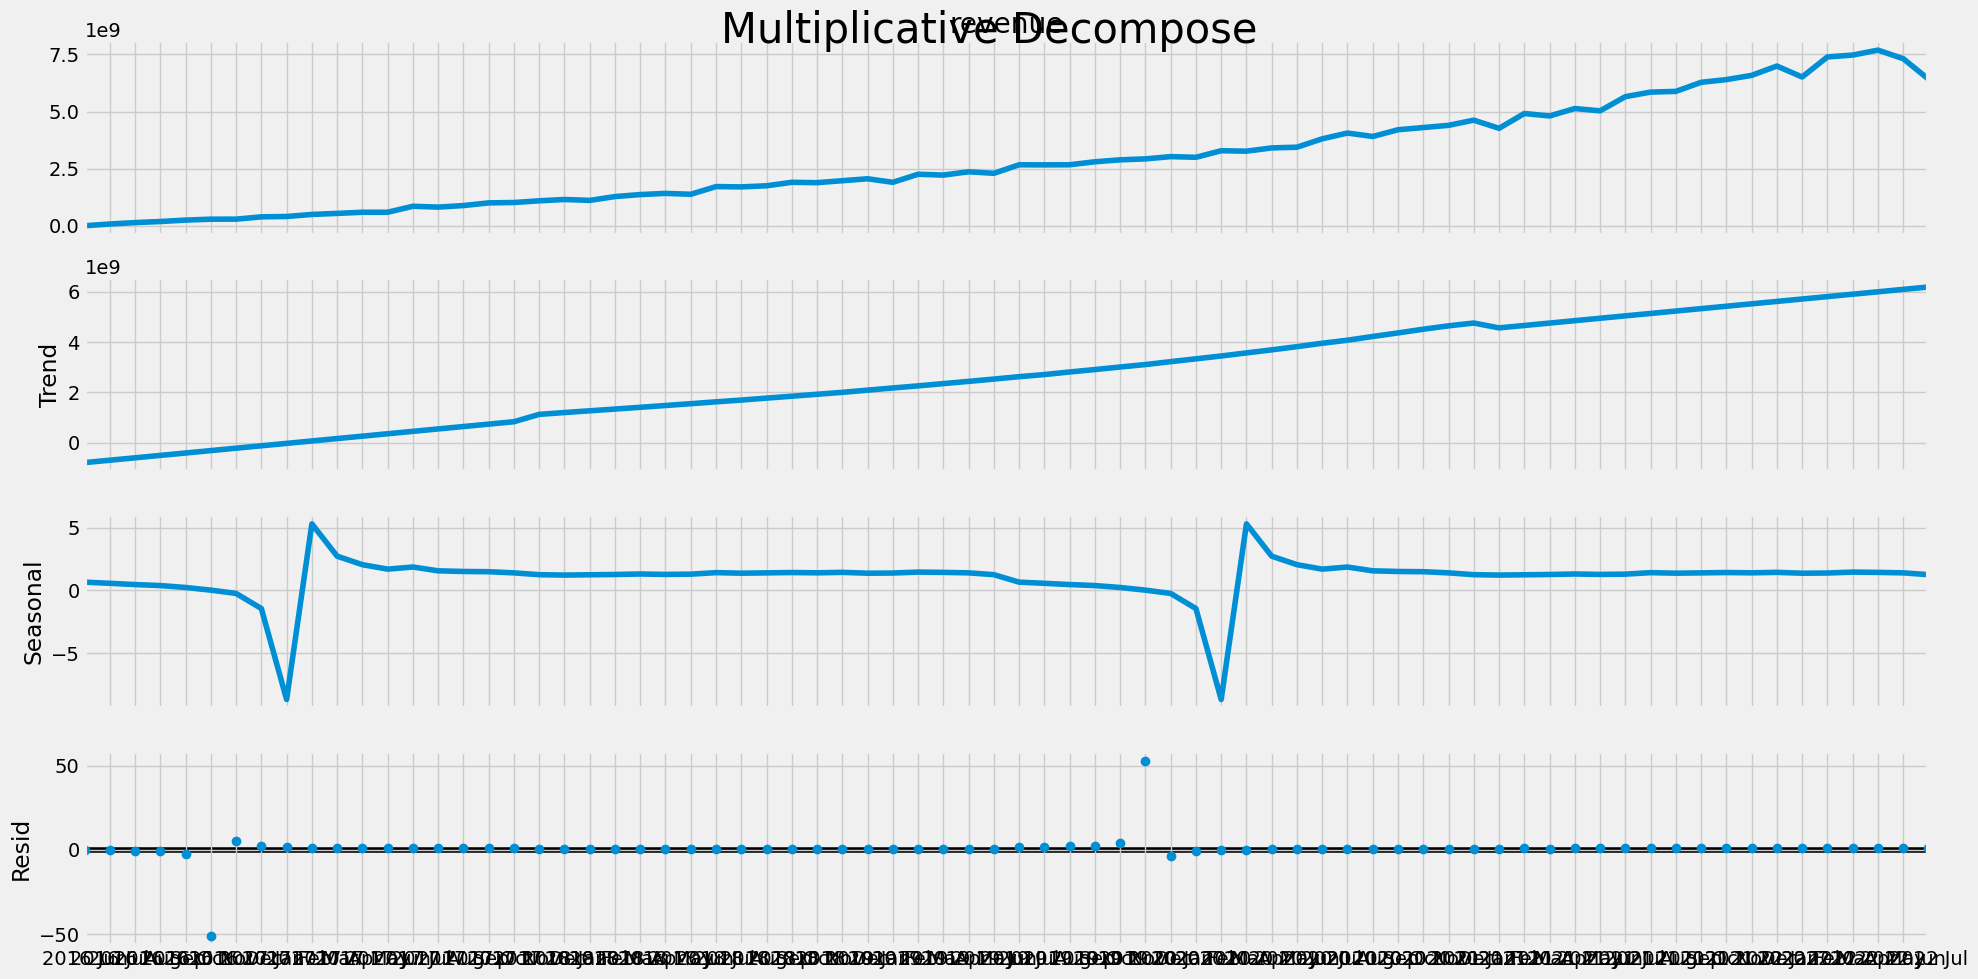

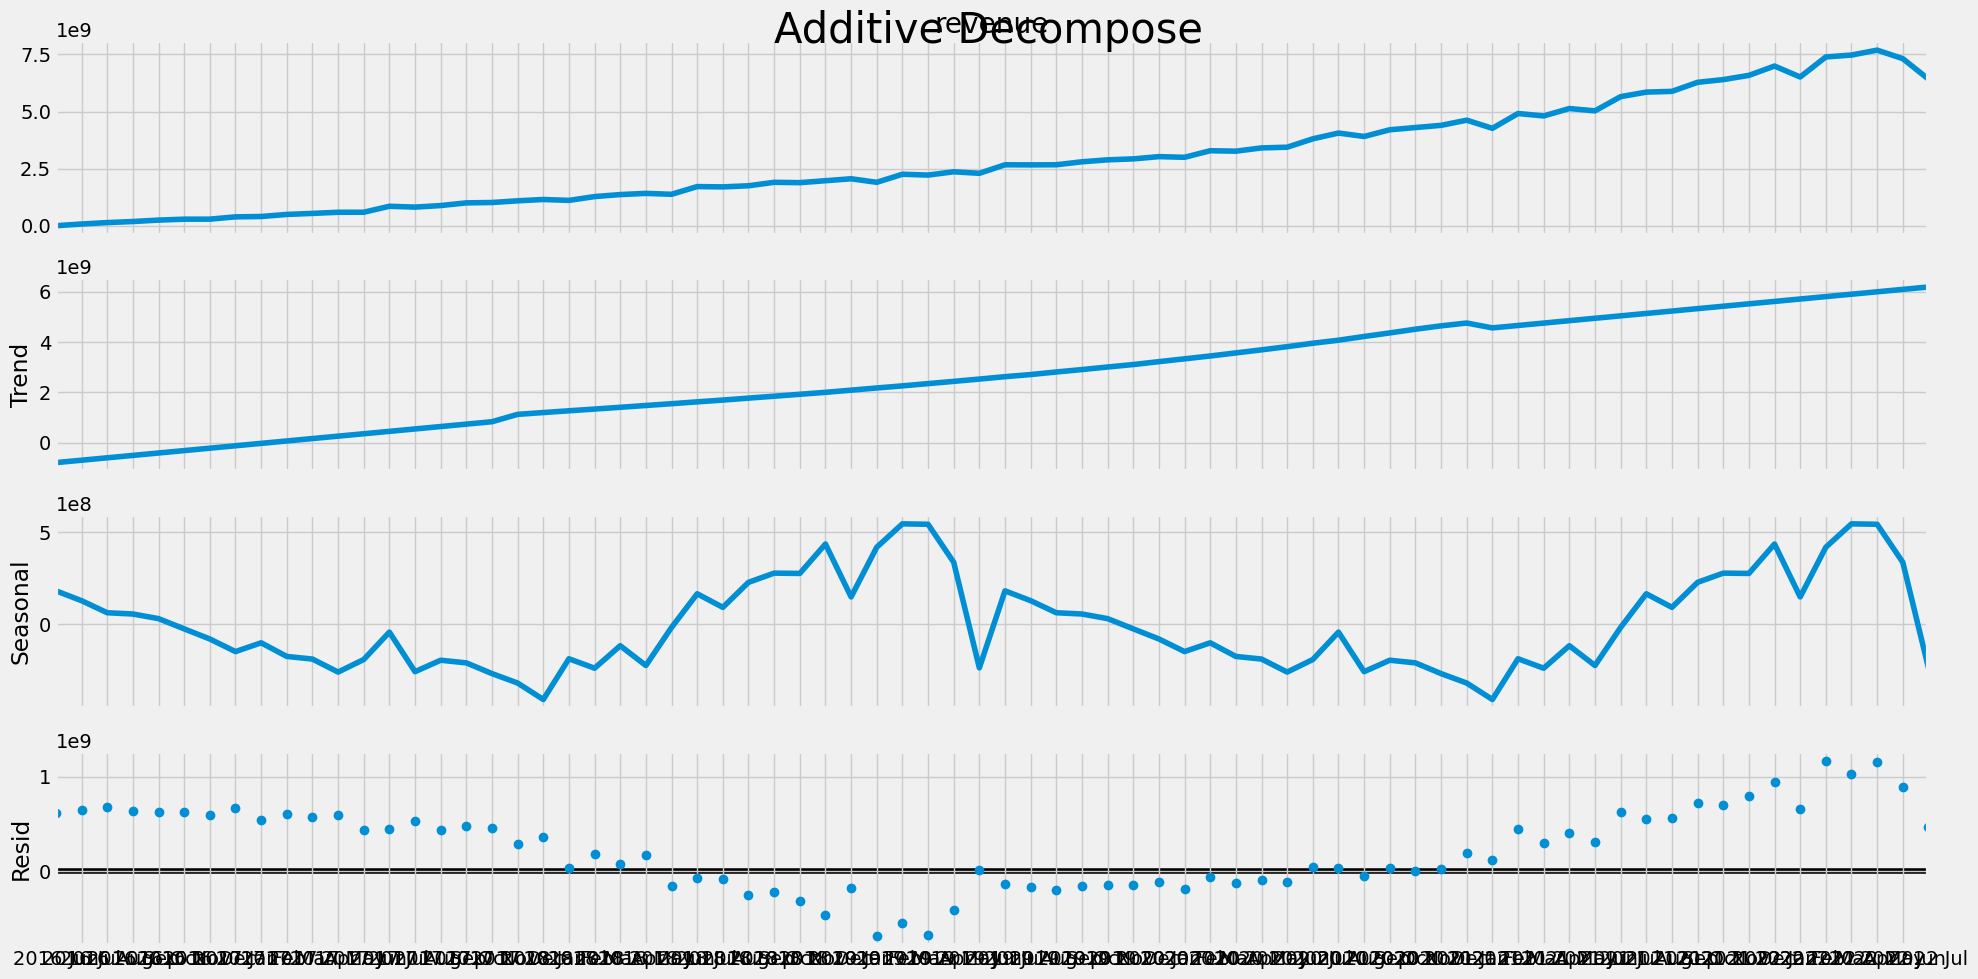

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (20, 10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
result_add.plot().suptitle('Additive Decompose', fontsize=30)
plt.show()

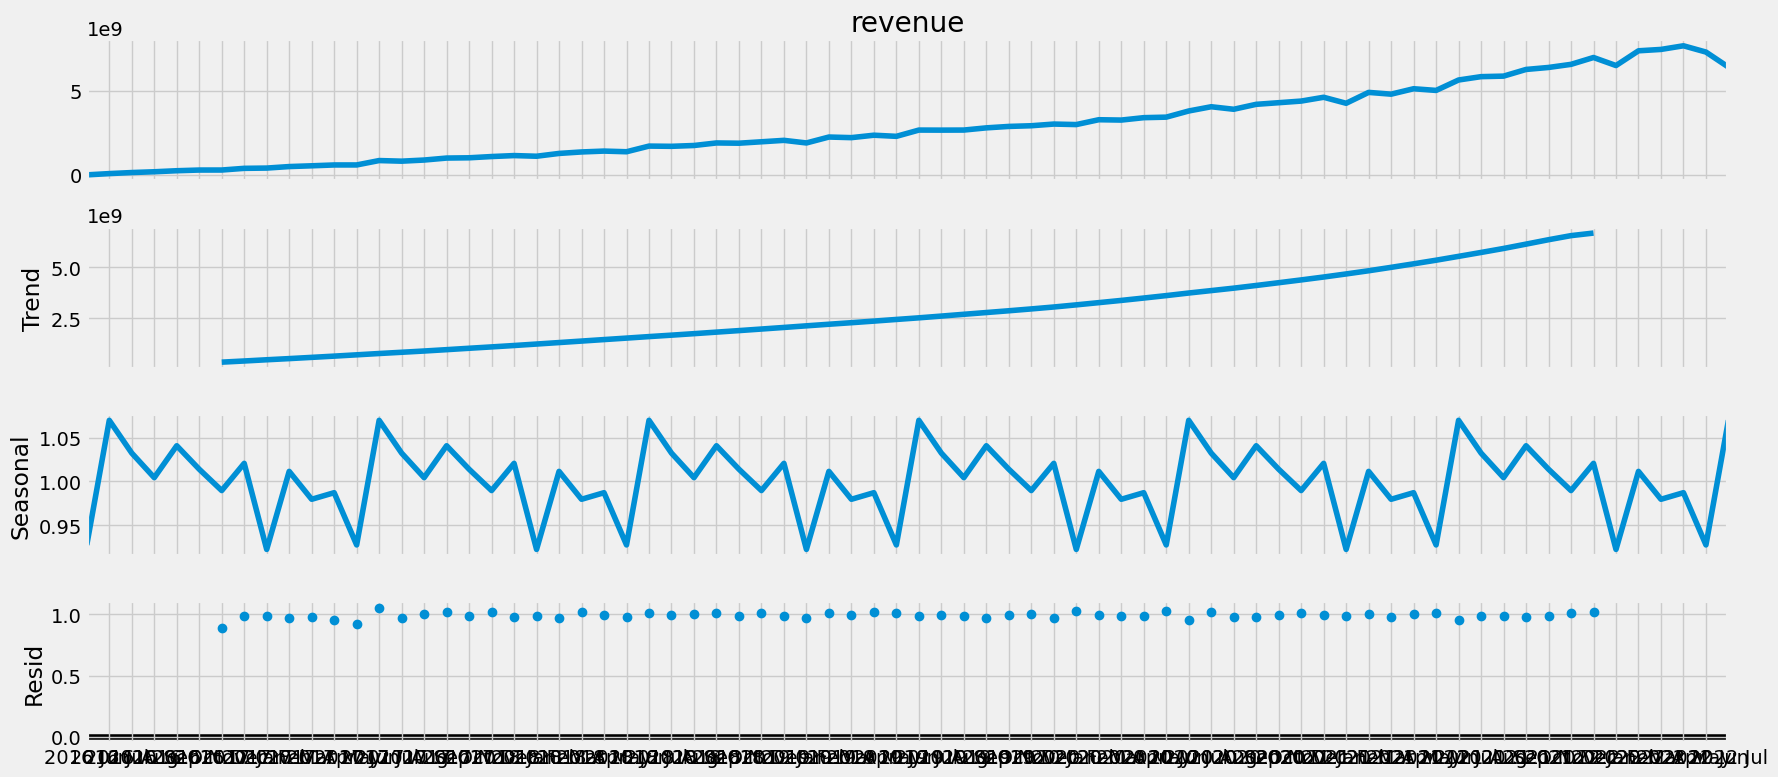

<Figure size 4000x1600 with 0 Axes>

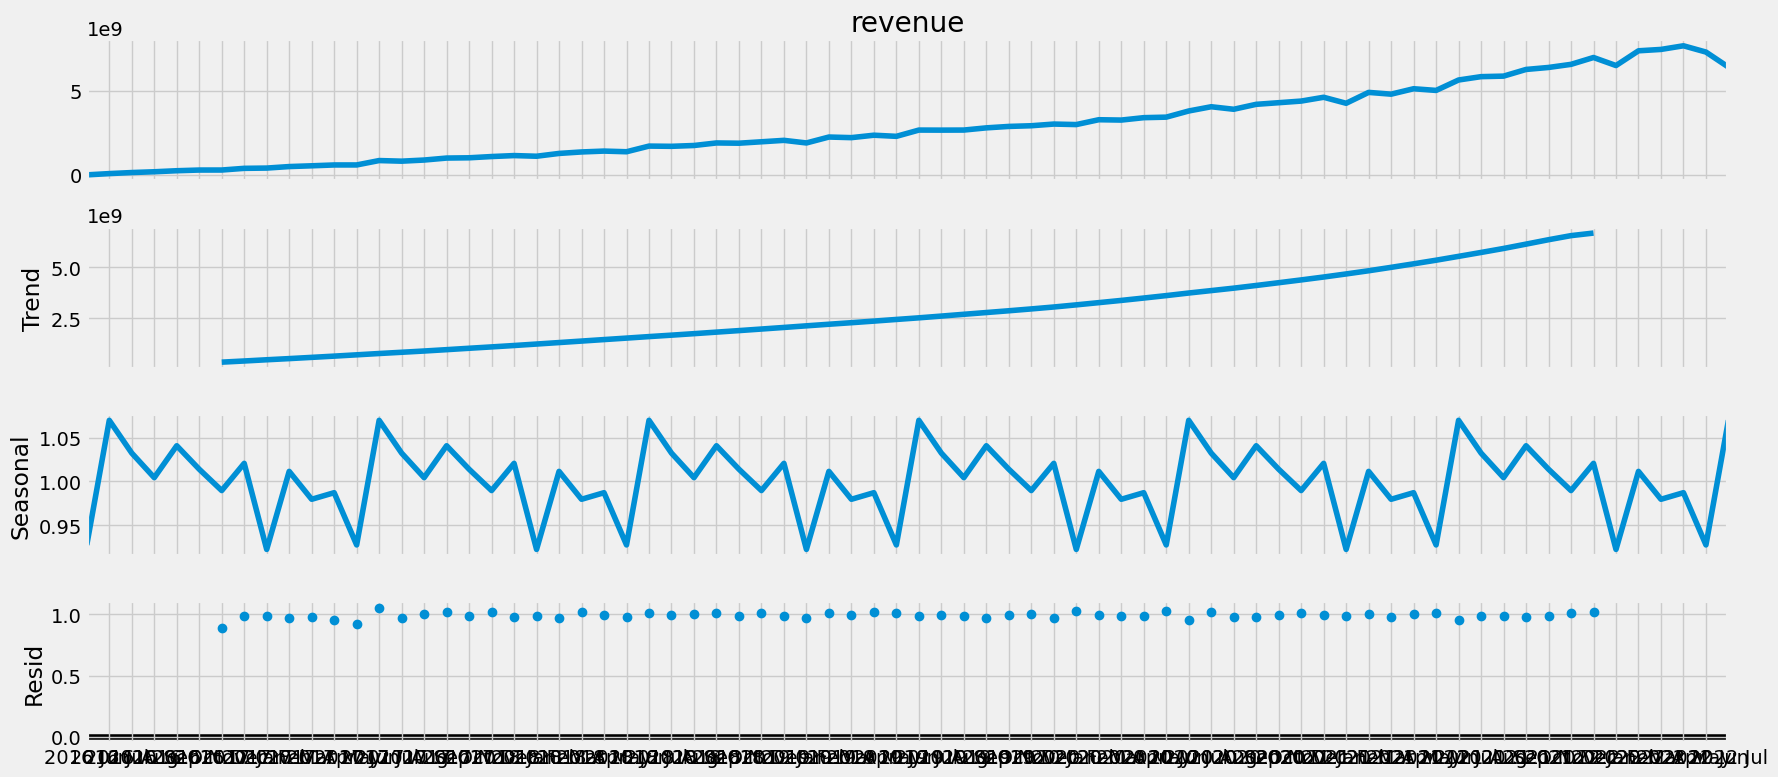

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = rev_monthly.revenue
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()

# **Modelling**

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Machine learning Model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Time Series Model**

In [ ]:
dt_new= dt_rev.copy()

In [ ]:
dt_new

Year Month  total_shipment  total_quantity  total_item_price  \
0   2016   Jun        10000.00            1.00         210265.00   
1   2016   Jul      2385000.00          296.00       75007902.12   
2   2016   Aug      4470000.00          547.00      135871116.12   
3   2016   Sep      5975000.00          717.00      181242736.00   
4   2016   Oct      7750000.00          989.00      241698461.62   
..   ...   ...             ...             ...               ...   
69  2022   Mar    240490000.00        28801.00     7197932527.88   
70  2022   Apr    244705000.00        29237.00     7276004521.88   
71  2022   May    253100000.00        30084.00     7485832807.00   
72  2022   Jun    239410000.00        28587.00     7121369356.75   
73  2022   Jul    210705000.00        25162.00     6244074000.12   

    total_promo_amount       revenue                       created_at  \
0                 0.00     220265.00 2018-07-29 15:22:01.458193+00:00   
1            937629.00   76455273.12 2018-07-30 12:40:22.365620+00:00   
2           1397463.50  138943652.62 2018-09-15 11:51:17.365620+00:00   
3           1729749.00  185487987.00 2018-11-01 11:23:48.365620+00:00   
4           2201484.50  247246977.12 2018-12-18 11:20:30.365620+00:00   
..                 ...           ...                              ...   
69         48664904.00 7389757623.88 2020-02-04 15:03:25.162570+00:00   
70         49541231.00 7471168290.88 2020-02-19 15:00:04.162570+00:00   
71         51066382.50 7687866424.50 2020-03-05 15:07:31.162570+00:00   
72         46447563.00 7314331793.75 2020-03-20 14:52:07.162570+00:00   
73         36397264.50 6418381735.62 2020-04-04 14:41:32.162570+00:00   

   yearmonth       date  
0   2016 Jun 2018-07-01  
1   2016 Jul 2018-07-01  
2   2016 Aug 2018-09-01  
3   2016 Sep 2018-11-01  
4   2016 Oct 2018-12-01  
..       ...        ...  
69  2022 Mar 2020-02-01  
70  2022 Apr 2020-02-01  
71  2022 May 2020-03-01  
72  2022 Jun 2020-03-01  
73  2022 Jul 2020-04-01  

[74 rows x 10 columns]

In [ ]:
bulan = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

dt_new['Month'] = dt_new['Month'].map(bulan)

In [ ]:
dt_new['yearmonth'] = dt_new['Year'] + '-' + dt_new['Month']

In [ ]:
dt_new

Year Month  total_shipment  total_quantity  total_item_price  \
0   2016    06        10000.00            1.00         210265.00   
1   2016    07      2385000.00          296.00       75007902.12   
2   2016    08      4470000.00          547.00      135871116.12   
3   2016    09      5975000.00          717.00      181242736.00   
4   2016    10      7750000.00          989.00      241698461.62   
..   ...   ...             ...             ...               ...   
69  2022    03    240490000.00        28801.00     7197932527.88   
70  2022    04    244705000.00        29237.00     7276004521.88   
71  2022    05    253100000.00        30084.00     7485832807.00   
72  2022    06    239410000.00        28587.00     7121369356.75   
73  2022    07    210705000.00        25162.00     6244074000.12   

    total_promo_amount       revenue                       created_at  \
0                 0.00     220265.00 2018-07-29 15:22:01.458193+00:00   
1            937629.00   76455273.12 2018-07-30 12:40:22.365620+00:00   
2           1397463.50  138943652.62 2018-09-15 11:51:17.365620+00:00   
3           1729749.00  185487987.00 2018-11-01 11:23:48.365620+00:00   
4           2201484.50  247246977.12 2018-12-18 11:20:30.365620+00:00   
..                 ...           ...                              ...   
69         48664904.00 7389757623.88 2020-02-04 15:03:25.162570+00:00   
70         49541231.00 7471168290.88 2020-02-19 15:00:04.162570+00:00   
71         51066382.50 7687866424.50 2020-03-05 15:07:31.162570+00:00   
72         46447563.00 7314331793.75 2020-03-20 14:52:07.162570+00:00   
73         36397264.50 6418381735.62 2020-04-04 14:41:32.162570+00:00   

   yearmonth       date  
0    2016-06 2018-07-01  
1    2016-07 2018-07-01  
2    2016-08 2018-09-01  
3    2016-09 2018-11-01  
4    2016-10 2018-12-01  
..       ...        ...  
69   2022-03 2020-02-01  
70   2022-04 2020-02-01  
71   2022-05 2020-03-01  
72   2022-06 2020-03-01  
73   2022-07 2020-04-01  

[74 rows x 10 columns]

In [ ]:
dt_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Year                74 non-null     object             
 1   Month               74 non-null     object             
 2   total_shipment      74 non-null     float64            
 3   total_quantity      74 non-null     float64            
 4   total_item_price    74 non-null     float64            
 5   total_promo_amount  74 non-null     float64            
 6   revenue             74 non-null     float64            
 7   created_at          74 non-null     datetime64[ns, UTC]
 8   yearmonth           74 non-null     object             
 9   date                74 non-null     datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), object(3)
memory usage: 5.9+ KB


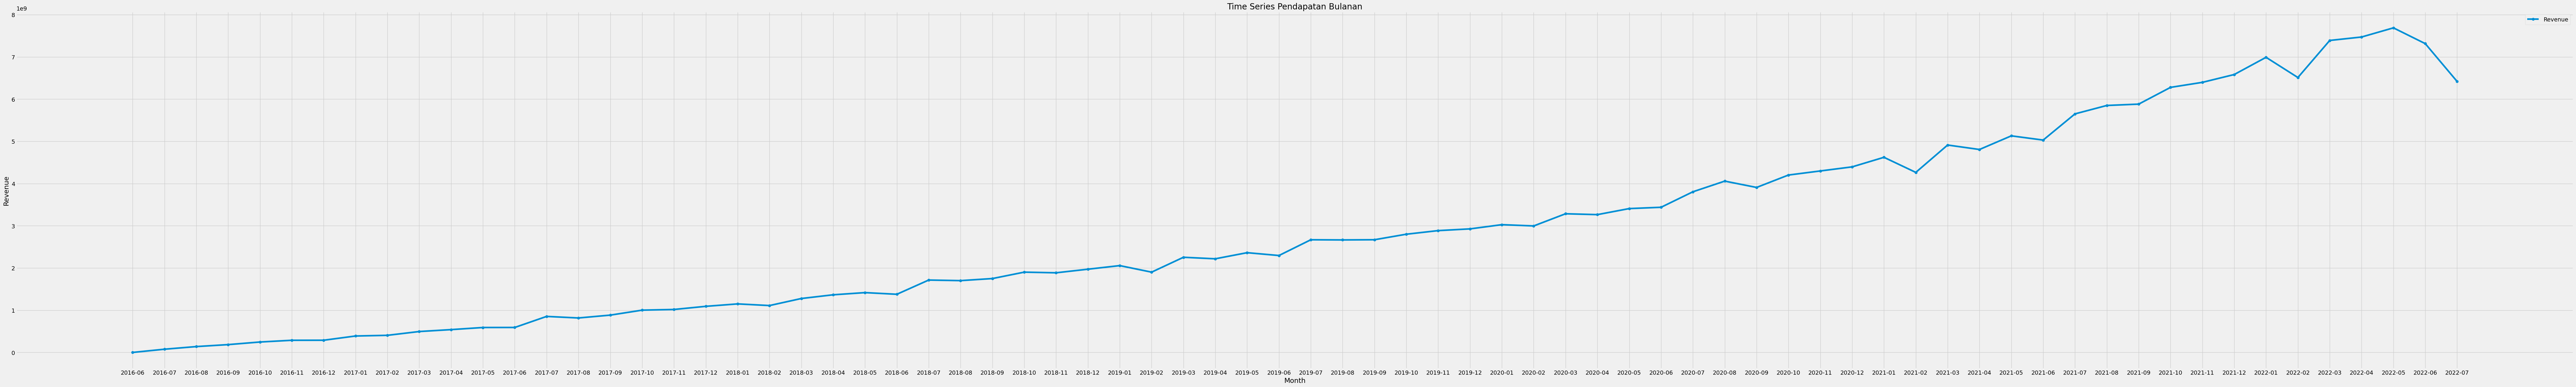

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Updated import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


pp = pd.DataFrame({'Month': dt_new['yearmonth'], 'Revenue': dt_new['revenue']})
pp.set_index('Month', inplace=True)

# Plot time series
plt.figure(figsize=(100, 15))
plt.plot(pp.index, pp['Revenue'], label='Revenue', marker='o')
plt.title('Time Series Pendapatan Bulanan')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dt_final =dt_new[['yearmonth', 'revenue']]
dt_final['yearmonth'] = pd.to_datetime(dt_final['yearmonth'])
dt_final.set_index('yearmonth', inplace=True)

In [ ]:
dt_final.shape

(74, 1)

In [ ]:
train = dt_final[:60]

In [ ]:
train

revenue
yearmonth               
2016-06-01     220265.00
2016-07-01   76455273.12
2016-08-01  138943652.62
2016-09-01  185487987.00
2016-10-01  247246977.12
2016-11-01  288081582.50
2016-12-01  289227727.50
2017-01-01  389488930.62
2017-02-01  405396160.50
2017-03-01  495291426.50
2017-04-01  540659824.38
2017-05-01  590636846.38
2017-06-01  591630616.38
2017-07-01  853082109.62
2017-08-01  816423670.50
2017-09-01  883910419.62
2017-10-01 1001674916.75
2017-11-01 1017751761.12
2017-12-01 1092141355.12
2018-01-01 1149591667.62
2018-02-01 1110483750.38
2018-03-01 1277350473.00
2018-04-01 1365294861.62
2018-05-01 1417020480.50
2018-06-01 1377662538.00
2018-07-01 1714468032.12
2018-08-01 1701065929.00
2018-09-01 1750004459.75
2018-10-01 1901822677.50
2018-11-01 1886416210.00
2018-12-01 1971448813.88
2019-01-01 2056621055.50
2019-02-01 1901722842.12
2019-03-01 2253892816.38
2019-04-01 2217987782.00
2019-05-01 2362578238.88
2019-06-01 2295678547.50
2019-07-01 2668665356.38
2019-08-01 2664931680.38
2019-09-01 2669593797.25
2019-10-01 2800234998.88
2019-11-01 2885516978.62
2019-12-01 2926613343.50
2020-01-01 3026260074.88
2020-02-01 2996258234.62
2020-03-01 3284465446.75
2020-04-01 3264203713.88
2020-05-01 3407276575.50
2020-06-01 3438290455.38
2020-07-01 3805205691.62
2020-08-01 4057857682.62
2020-09-01 3907957251.12
2020-10-01 4201711233.62
2020-11-01 4298473717.75
2020-12-01 4395163416.25
2021-01-01 4621668119.38
2021-02-01 4264546886.62
2021-03-01 4912644119.50
2021-04-01 4806910330.12
2021-05-01 5130084887.62

In [ ]:
len(train)

60

In [ ]:
test = dt_final[60:]

In [ ]:
test

revenue
yearmonth               
2021-06-01 5029918613.25
2021-07-01 5650619220.62
2021-08-01 5849709072.88
2021-09-01 5881557469.38
2021-10-01 6278338321.25
2021-11-01 6397252378.88
2021-12-01 6582357319.88
2022-01-01 6990146437.12
2022-02-01 6511467869.38
2022-03-01 7389757623.88
2022-04-01 7471168290.88
2022-05-01 7687866424.50
2022-06-01 7314331793.75
2022-07-01 6418381735.62

In [ ]:
len(test)

14

### SARIMA

In [ ]:
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.display import HTML as html_print
from termcolor import colored
from IPython.display import display
warnings.filterwarnings('ignore')

In [ ]:
p = d = q = range(0, 2)

In [ ]:
pdq = list(itertools.product(p, d, q))

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=14)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)

                # mae = fit_model_sarima(train, val, param, param_seasonal)

                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

In [ ]:
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:6532348040.803572
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:5153384446.911721
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:2312061616.616071
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:1584507906.134941
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:2351338012.632212
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:1603251127.7446625
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:776074393.8209406
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:559605022.5922091
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:6319007989.260384
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:5124893773.442355
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:2155169385.1329894
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:1632908196.5291355
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:4382716117.756402
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:4384055061.310057
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:700945986.1560794
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:1416572620.9464285
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:1054840910.8700439
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - MAE:48079

In [ ]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)

In [ ]:
sarima_final_model = model.fit(disp=0)

In [ ]:
y_pred_test = sarima_final_model.get_forecast(steps=14)

In [ ]:
y_pred_test

In [ ]:
y_pred_sarima = y_pred_test.predicted_mean

In [ ]:
y_pred_sarima

2021-06-01   5165315144.08
2021-07-01   5566378115.46
2021-08-01   5846606442.13
2021-09-01   5679525401.44
2021-10-01   6002816643.90
2021-11-01   6109381641.72
2021-12-01   6215478310.58
2022-01-01   6464903403.70
2022-02-01   6069936687.05
2022-03-01   6783741092.21
2022-04-01   6666205631.41
2022-05-01   7022417812.75
2022-06-01   7061752726.61
2022-07-01   7496080489.04
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
def plot_prediction(y_pred, label):
    train["revenue"].plot(legend=True, label="TRAIN", color='goldenrod')
    test["revenue"].plot(legend=True, label="TEST",color='mediumblue')
    y_pred.plot(legend=True, label="PREDICTION", color='red')
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()

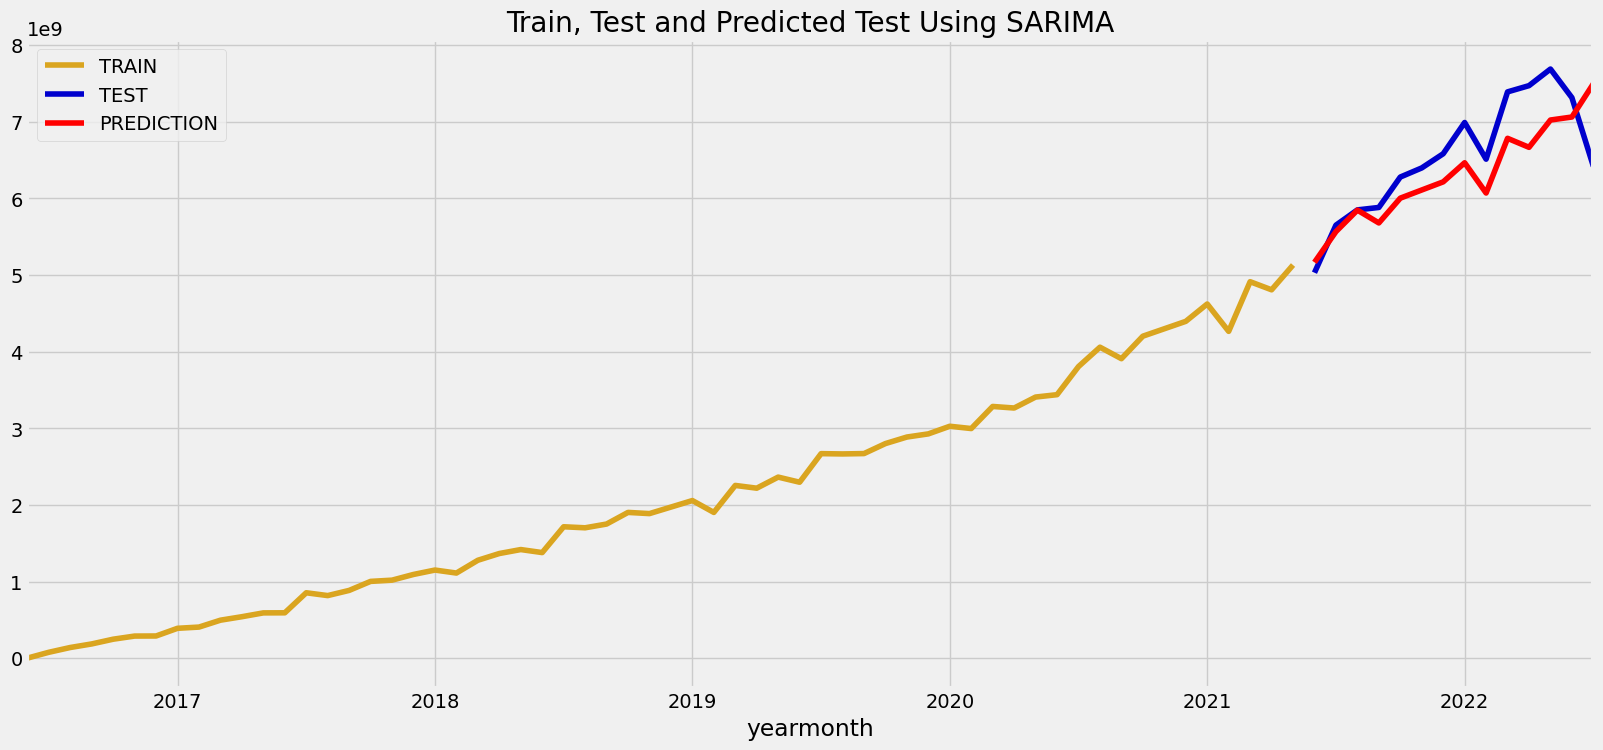

In [ ]:
plot_prediction(pd.Series(y_pred_sarima, index=test.index), "SARIMA")

In [ ]:
mape = mean_absolute_percentage_error(test, y_pred_sarima)
mse = mean_squared_error(test, y_pred_sarima)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)

Mean Absolute Percentage Error: 0.060216057308815865
Mean Squared Error: 2.5098149447858336e+17


### Double Exponential Smoothing

In [ ]:
def des_optimizer(train, alphas, betas, step=28):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

In [ ]:
alphas = np.arange(0.01, 1, 0.10)

In [ ]:
betas = np.arange(0.01, 1, 0.10)

In [ ]:
best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=14)

alpha: 0.01 beta: 0.01 mae: 1616317156.0726
alpha: 0.01 beta: 0.11 mae: 1737580310.6825
alpha: 0.01 beta: 0.21 mae: 1855520373.1635
alpha: 0.01 beta: 0.31 mae: 1591475681.8015
alpha: 0.01 beta: 0.41 mae: 1572008914.1972
alpha: 0.01 beta: 0.51 mae: 1210290947.5128
alpha: 0.01 beta: 0.61 mae: 927292642.2198
alpha: 0.01 beta: 0.71 mae: 887327353.272
alpha: 0.01 beta: 0.81 mae: 876522593.5273
alpha: 0.01 beta: 0.91 mae: 847125511.674
alpha: 0.11 beta: 0.01 mae: 1254407407.9472
alpha: 0.11 beta: 0.11 mae: 815195140.376
alpha: 0.11 beta: 0.21 mae: 653936243.5109
alpha: 0.11 beta: 0.31 mae: 556204631.5946
alpha: 0.11 beta: 0.41 mae: 505670170.5764
alpha: 0.11 beta: 0.51 mae: 493822149.8373
alpha: 0.11 beta: 0.61 mae: 504302141.5902
alpha: 0.11 beta: 0.71 mae: 521668805.7436
alpha: 0.11 beta: 0.81 mae: 552040109.7868
alpha: 0.11 beta: 0.91 mae: 587992571.1049
alpha: 0.21 beta: 0.01 mae: 1252956983.4294
alpha: 0.21 beta: 0.11 mae: 695541198.6439
alpha: 0.21 beta: 0.21 mae: 585339440.9772
alpha:

In [ ]:
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)

In [ ]:
y_pred = des_model.forecast(14)

In [ ]:
y_pred

2021-06-01   5313872846.35
2021-07-01   5526393700.17
2021-08-01   5738914553.98
2021-09-01   5951435407.79
2021-10-01   6163956261.61
2021-11-01   6376477115.42
2021-12-01   6588997969.24
2022-01-01   6801518823.05
2022-02-01   7014039676.87
2022-03-01   7226560530.68
2022-04-01   7439081384.50
2022-05-01   7651602238.31
2022-06-01   7864123092.13
2022-07-01   8076643945.94
Freq: MS, dtype: float64

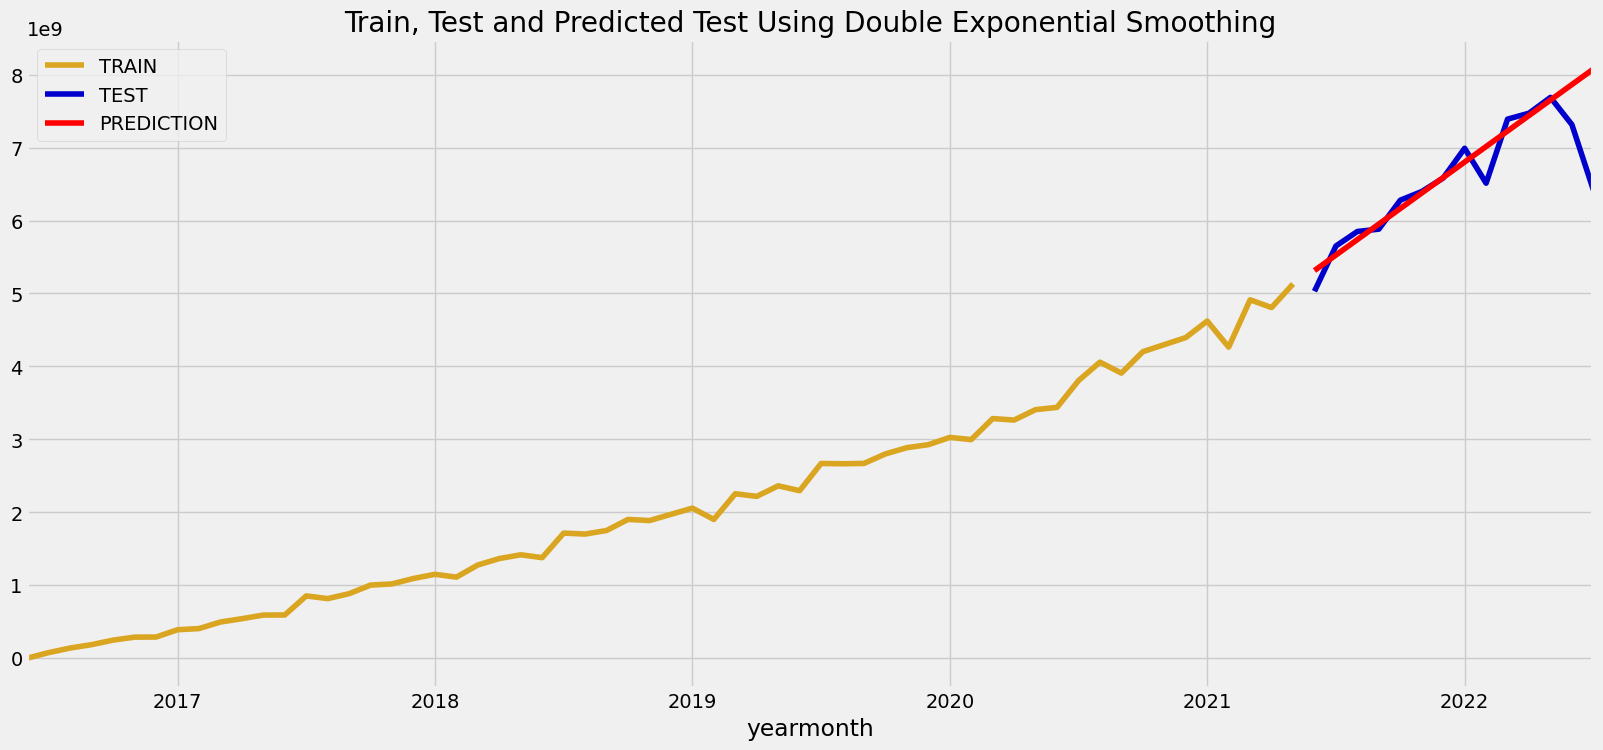

In [ ]:
plot_prediction(y_pred, "Double Exponential Smoothing")

In [ ]:
mape = mean_absolute_percentage_error(test, y_pred)
mse = mean_squared_error(test, y_pred)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)

Mean Absolute Percentage Error: 0.042894609694847076
Mean Squared Error: 2.497157202782833e+17


### Prophet

In [ ]:
from prophet import Prophet
from datetime import datetime, timedelta

In [ ]:
train = train.rename_axis(index='ds')

train_prophet = train.reset_index() \
    .rename(columns={'revenue':'y'})

test = test.rename_axis(index='ds')

test_prophet = test.reset_index() \
    .rename(columns={'revenue':'y'})

In [ ]:
m_prophet = Prophet()
m_prophet.fit(train_prophet)

datenow = datetime(2021,6,1)

# Set the number of months for forecasting
forecast_months = 14

# Create a future DataFrame with monthly intervals
future = pd.DataFrame({
    'ds': pd.date_range(start=datenow, periods=forecast_months, freq='MS')  # 'MS' stands for Month Start
})


forecast_prophet = m_prophet.predict(future)
forecast_prophet [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54yra89a/n9u4uo_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54yra89a/xrg4gzk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52429', 'data', 'file=/tmp/tmp54yra89a/n9u4uo_b.json', 'init=/tmp/tmp54yra89a/xrg4gzk0.json', 'output', 'file=/tmp/tmp54yra89a/prophet_modelb909yr7s/prophet_model-20231219133542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds          yhat    yhat_lower    yhat_upper
9  2022-03-01 6403290615.73 6312962375.58 6492286215.34
10 2022-04-01 6451448582.70 6351900657.15 6544939752.79
11 2022-05-01 6631197649.00 6536935182.92 6720513915.83
12 2022-06-01 6641030035.52 6534009941.50 6754029391.66
13 2022-07-01 7021967003.54 6901554415.35 7131243753.90

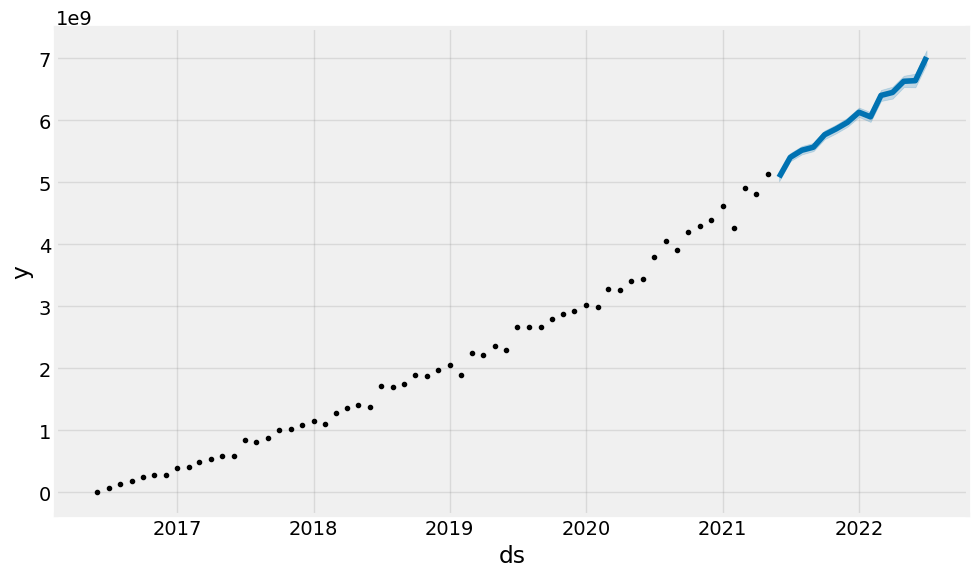

In [ ]:
fig1 = m_prophet.plot(forecast_prophet)

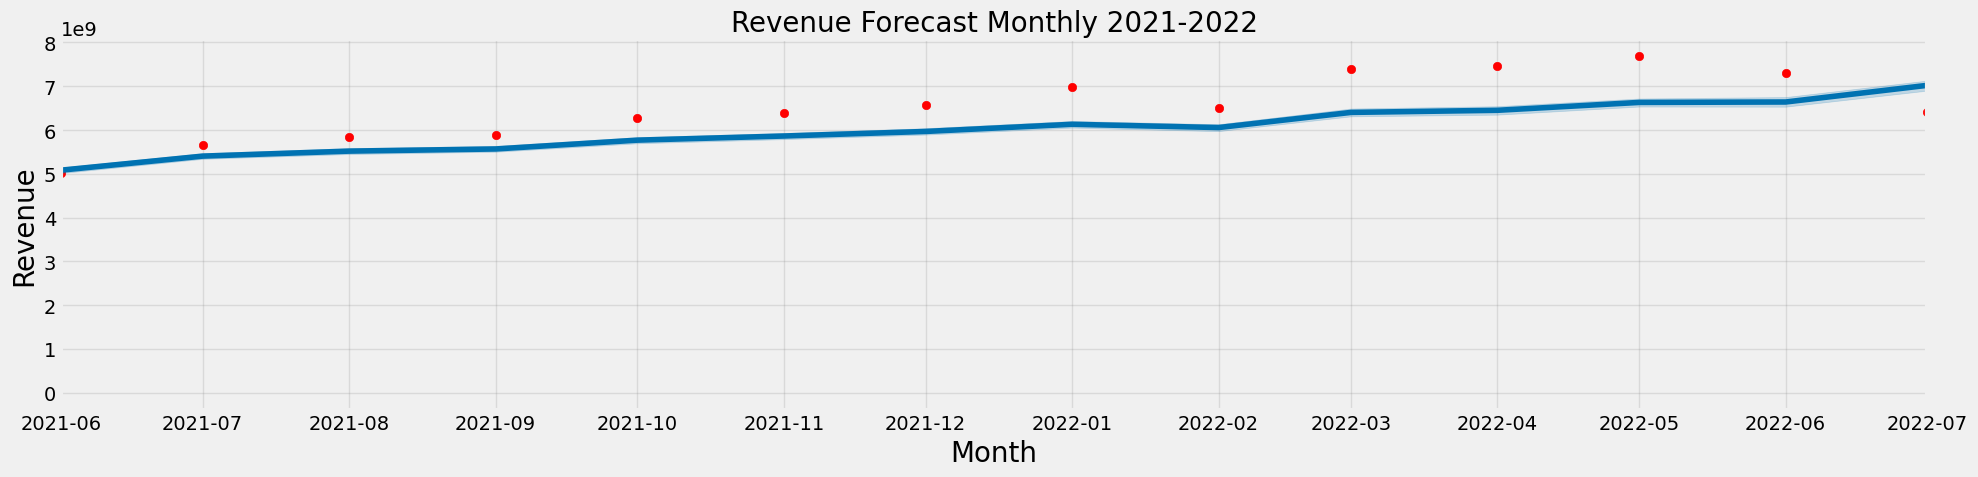

In [ ]:
from matplotlib.dates import MonthLocator

fig, ax = plt.subplots(figsize=(20, 5))

# Scatter plot of revenue data
ax.scatter(dt_final.index, dt_final['revenue'], color='r')
# Plot Prophet forecast on the same axis
fig = m_prophet.plot(forecast_prophet, ax=ax)

# Set x-axis locator to display monthly intervals
months = MonthLocator()
ax.xaxis.set_major_locator(months)

# Convert date strings to datetime objects
date_lower = pd.to_datetime('2021-06-01')
date_upper = pd.to_datetime('2022-07-01')

# Set x-axis limits
ax.set_xlim(date_lower, date_upper)
plt.title("Revenue Forecast Monthly 2021-2022", fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Revenue", fontsize=20)
plt.tight_layout()
plt.show()

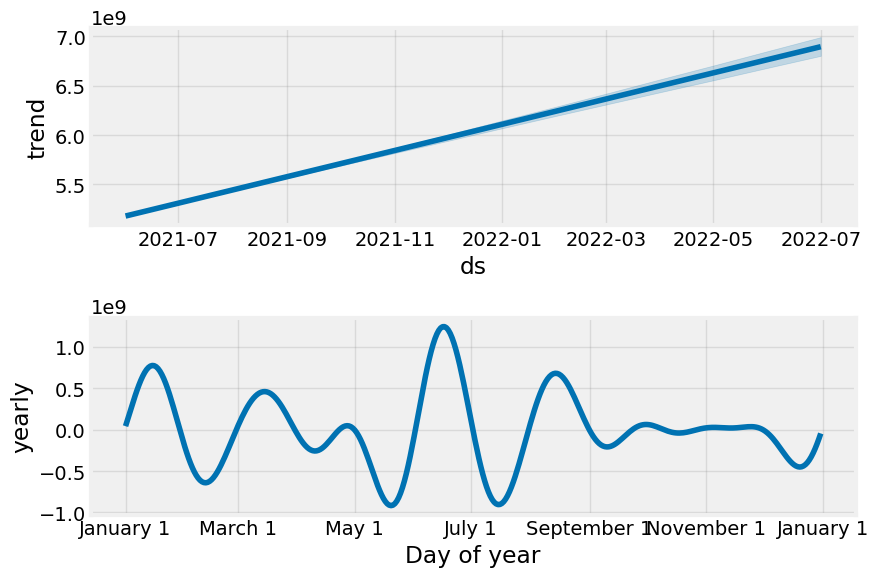

In [ ]:
fig2 = m_prophet.plot_components(forecast_prophet)

# Hyperparameters

In [ ]:
param_grid = {
    # tuning those parameters can potentially improve the performance of our model
    'changepoint_prior_scale': [0.001, 0.1],
 #  'seasonality_prior_scale': [0.01, 1.0],
   # 'holidays_prior_scale': [0.01, 0.1],
   # 'n_changepoints': [25],
    'seasonality_mode': ['additive', 'multiplicative'],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []

# Quick peek at what our combinations look like
all_params

[{'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive'},
 {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative'},
 {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive'},
 {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}]

In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import itertools

In [ ]:
for params in all_params:
    m = Prophet(**params).fit(train_prophet)
    df_cv = cross_validation(m, initial = '100 days', period = '30 days', horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

#m = Prophet()
#m.fit(m_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54yra89a/6377okkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54yra89a/xa3gkpj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50860', 'data', 'file=/tmp/tmp54yra89a/6377okkw.json', 'init=/tmp/tmp54yra89a/xa3gkpj6.json', 'output', 'file=/tmp/tmp54yra89a/prophet_modeln2pss2j9/prophet_model-20231219133544.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:35:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:35:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 55 forecasts with c

   changepoint_prior_scale seasonality_mode          rmse
0                     0.00         additive 3051423442.22
1                     0.00   multiplicative 1814842152.46
2                     0.10         additive 2791230843.08
3                     0.10   multiplicative  762214873.01
{'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


In [ ]:
m = Prophet(**params)
m.fit(train_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54yra89a/47u05x67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54yra89a/eait8l6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57212', 'data', 'file=/tmp/tmp54yra89a/47u05x67.json', 'init=/tmp/tmp54yra89a/eait8l6b.json', 'output', 'file=/tmp/tmp54yra89a/prophet_modelnytsd9dt/prophet_model-20231219133831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:38:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:38:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


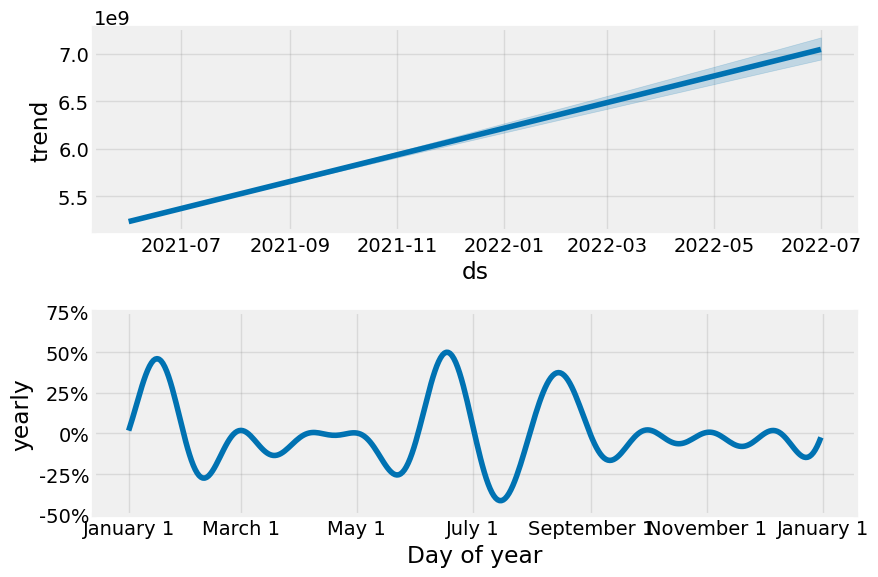

In [ ]:
future = pd.DataFrame({
    'ds': pd.date_range(start=datenow, periods=forecast_months, freq='MS')  # 'MS' stands for Month Start
})
forecast_prophet = m.predict(future)
m.plot_components(forecast_prophet)
print()

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mape = mean_absolute_percentage_error(test_prophet.y.array,forecast_prophet.yhat.array)
mse = mean_squared_error(test_prophet.y.array,forecast_prophet.yhat.array)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)

Mean Absolute Percentage Error: 0.08019941102258905
Mean Squared Error: 4.183550912007187e+17


In [ ]:
prophet_results = forecast_prophet[['ds', 'yhat']]
result_series = pd.Series(prophet_results['yhat'].values, index=prophet_results['ds'])

# Ensembled

In [ ]:
ensemble_pred = 0.4 * y_pred_sarima + 0.4 * y_pred + 0.2 * result_series

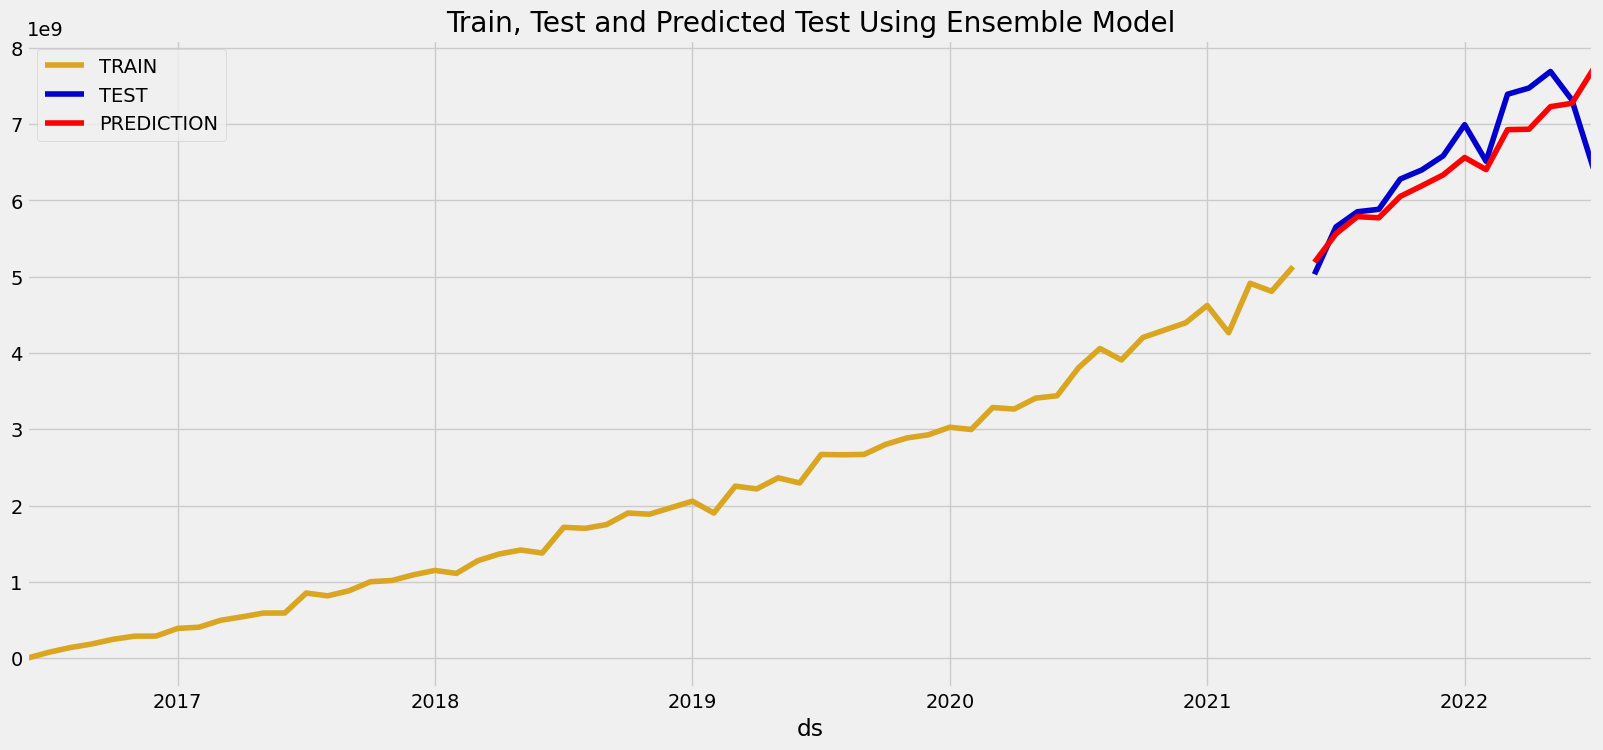

In [ ]:
plot_prediction(ensemble_pred, "Ensemble Model")

In [ ]:
ensemble_pred

2021-06-01   5187972273.76
2021-07-01   5560210067.65
2021-08-01   5785539668.42
2021-09-01   5770645812.19
2021-10-01   6051029612.20
2021-11-01   6189453419.76
2021-12-01   6332694344.12
2022-01-01   6560630323.76
2022-02-01   6401746200.17
2022-03-01   6925601049.14
2022-04-01   6931194588.03
2022-05-01   7226659591.88
2022-06-01   7270878654.65
2022-07-01   7719740740.97
Freq: MS, dtype: float64

In [ ]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mape = mean_absolute_percentage_error(test, ensemble_pred)
mse = mean_squared_error(test, ensemble_pred)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)

Mean Absolute Percentage Error: 0.047566829080250006
Mean Squared Error: 2.01316155807982e+17


In [ ]:
ensemble_pred

2021-06-01   5187972273.76
2021-07-01   5560210067.65
2021-08-01   5785539668.42
2021-09-01   5770645812.19
2021-10-01   6051029612.20
2021-11-01   6189453419.76
2021-12-01   6332694344.12
2022-01-01   6560630323.76
2022-02-01   6401746200.17
2022-03-01   6925601049.14
2022-04-01   6931194588.03
2022-05-01   7226659591.88
2022-06-01   7270878654.65
2022-07-01   7719740740.97
Freq: MS, dtype: float64

In [ ]:
actual = train
actual

revenue
ds                      
2016-06-01     220265.00
2016-07-01   76455273.12
2016-08-01  138943652.62
2016-09-01  185487987.00
2016-10-01  247246977.12
2016-11-01  288081582.50
2016-12-01  289227727.50
2017-01-01  389488930.62
2017-02-01  405396160.50
2017-03-01  495291426.50
2017-04-01  540659824.38
2017-05-01  590636846.38
2017-06-01  591630616.38
2017-07-01  853082109.62
2017-08-01  816423670.50
2017-09-01  883910419.62
2017-10-01 1001674916.75
2017-11-01 1017751761.12
2017-12-01 1092141355.12
2018-01-01 1149591667.62
2018-02-01 1110483750.38
2018-03-01 1277350473.00
2018-04-01 1365294861.62
2018-05-01 1417020480.50
2018-06-01 1377662538.00
2018-07-01 1714468032.12
2018-08-01 1701065929.00
2018-09-01 1750004459.75
2018-10-01 1901822677.50
2018-11-01 1886416210.00
2018-12-01 1971448813.88
2019-01-01 2056621055.50
2019-02-01 1901722842.12
2019-03-01 2253892816.38
2019-04-01 2217987782.00
2019-05-01 2362578238.88
2019-06-01 2295678547.50
2019-07-01 2668665356.38
2019-08-01 2664931680.38
2019-09-01 2669593797.25
2019-10-01 2800234998.88
2019-11-01 2885516978.62
2019-12-01 2926613343.50
2020-01-01 3026260074.88
2020-02-01 2996258234.62
2020-03-01 3284465446.75
2020-04-01 3264203713.88
2020-05-01 3407276575.50
2020-06-01 3438290455.38
2020-07-01 3805205691.62
2020-08-01 4057857682.62
2020-09-01 3907957251.12
2020-10-01 4201711233.62
2020-11-01 4298473717.75
2020-12-01 4395163416.25
2021-01-01 4621668119.38
2021-02-01 4264546886.62
2021-03-01 4912644119.50
2021-04-01 4806910330.12
2021-05-01 5130084887.62

In [ ]:
actual.reset_index()

ds       revenue
0  2016-06-01     220265.00
1  2016-07-01   76455273.12
2  2016-08-01  138943652.62
3  2016-09-01  185487987.00
4  2016-10-01  247246977.12
5  2016-11-01  288081582.50
6  2016-12-01  289227727.50
7  2017-01-01  389488930.62
8  2017-02-01  405396160.50
9  2017-03-01  495291426.50
10 2017-04-01  540659824.38
11 2017-05-01  590636846.38
12 2017-06-01  591630616.38
13 2017-07-01  853082109.62
14 2017-08-01  816423670.50
15 2017-09-01  883910419.62
16 2017-10-01 1001674916.75
17 2017-11-01 1017751761.12
18 2017-12-01 1092141355.12
19 2018-01-01 1149591667.62
20 2018-02-01 1110483750.38
21 2018-03-01 1277350473.00
22 2018-04-01 1365294861.62
23 2018-05-01 1417020480.50
24 2018-06-01 1377662538.00
25 2018-07-01 1714468032.12
26 2018-08-01 1701065929.00
27 2018-09-01 1750004459.75
28 2018-10-01 1901822677.50
29 2018-11-01 1886416210.00
30 2018-12-01 1971448813.88
31 2019-01-01 2056621055.50
32 2019-02-01 1901722842.12
33 2019-03-01 2253892816.38
34 2019-04-01 2217987782.00
35 2019-05-01 2362578238.88
36 2019-06-01 2295678547.50
37 2019-07-01 2668665356.38
38 2019-08-01 2664931680.38
39 2019-09-01 2669593797.25
40 2019-10-01 2800234998.88
41 2019-11-01 2885516978.62
42 2019-12-01 2926613343.50
43 2020-01-01 3026260074.88
44 2020-02-01 2996258234.62
45 2020-03-01 3284465446.75
46 2020-04-01 3264203713.88
47 2020-05-01 3407276575.50
48 2020-06-01 3438290455.38
49 2020-07-01 3805205691.62
50 2020-08-01 4057857682.62
51 2020-09-01 3907957251.12
52 2020-10-01 4201711233.62
53 2020-11-01 4298473717.75
54 2020-12-01 4395163416.25
55 2021-01-01 4621668119.38
56 2021-02-01 4264546886.62
57 2021-03-01 4912644119.50
58 2021-04-01 4806910330.12
59 2021-05-01 5130084887.62

In [ ]:
ensembled2 = actual.reset_index() \
    .rename(columns={'ds':'date',
                     'revenue':'revenue'})

In [ ]:
ensembled2 = ensembled2[-5:]

In [ ]:
ensembled2

date       revenue
55 2021-01-01 4621668119.38
56 2021-02-01 4264546886.62
57 2021-03-01 4912644119.50
58 2021-04-01 4806910330.12
59 2021-05-01 5130084887.62

In [ ]:
ensembled = ensemble_pred.reset_index() \
    .rename(columns={'index':'date',
                     0:'revenue'})

In [ ]:
ensembled

date       revenue
0  2021-06-01 5187972273.76
1  2021-07-01 5560210067.65
2  2021-08-01 5785539668.42
3  2021-09-01 5770645812.19
4  2021-10-01 6051029612.20
5  2021-11-01 6189453419.76
6  2021-12-01 6332694344.12
7  2022-01-01 6560630323.76
8  2022-02-01 6401746200.17
9  2022-03-01 6925601049.14
10 2022-04-01 6931194588.03
11 2022-05-01 7226659591.88
12 2022-06-01 7270878654.65
13 2022-07-01 7719740740.97

In [ ]:
final2 = pd.concat([ensembled2, ensembled], ignore_index=True)

In [ ]:
final2

date       revenue
0  2021-01-01 4621668119.38
1  2021-02-01 4264546886.62
2  2021-03-01 4912644119.50
3  2021-04-01 4806910330.12
4  2021-05-01 5130084887.62
5  2021-06-01 5187972273.76
6  2021-07-01 5560210067.65
7  2021-08-01 5785539668.42
8  2021-09-01 5770645812.19
9  2021-10-01 6051029612.20
10 2021-11-01 6189453419.76
11 2021-12-01 6332694344.12
12 2022-01-01 6560630323.76
13 2022-02-01 6401746200.17
14 2022-03-01 6925601049.14
15 2022-04-01 6931194588.03
16 2022-05-01 7226659591.88
17 2022-06-01 7270878654.65
18 2022-07-01 7719740740.97

In [ ]:
final2.to_csv("final2.csv")